In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
sheet_id = "1L_a6AEMjAzfmBkrKSlBnKsZHR7kCdM7b"

# Hàm tiện ích để đọc từng sheet
def read_google_sheet(sheet_name):
    url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    return pd.read_csv(url)

# Đọc từng sheet
df_data = read_google_sheet("data")
df_short_rate = read_google_sheet("short_rate")
df_macro = read_google_sheet("macro")
df_gdp = read_google_sheet("gdp")

In [ ]:
df_gdp.tail()

,Quarter,Year,Date,gdp_growth
24,1,2024,29/03/2024,"5,66"
25,2,2024,28/06/2024,"6,93"
26,3,2024,30/09/2024,"7,4"
27,4,2024,31/12/2024,"7,55"
28,1,2025,31/03/2025,"7,7"


In [ ]:
df_data.head()

,STT,Mã TP,Date,Trạng thái BM,Kỳ hạn ngày,Kỳ hạn,Lãi suất,Hưởng quyền,Ngày đáo hạn,Ngày trả lãi trước,Ngày trả lãi kế tiếp,Trả lãi trước/sau,Định kỳ trả lãi (tháng),Zero rate,Giá T.H,Giá sạch,YTM,Macaulay Duaration,Modified Duration,Convexity
0,1,TB1328154,26/04/2019,Không đạt Benchmark,3354,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,30/06/2019,Trả lãi Cuối kỳ,12,"4,548547653","139,911506","132,596","4,4855","6,639772718","6,354731248","55,77260563"
1,2,TD1020046,26/04/2019,Không đạt Benchmark,409,1 năm,"11,3",Có hưởng lãi,07/06/2020,07/06/2018,07/06/2019,Trả lãi Cuối kỳ,12,"3,214590239","118,641762","108,642","3,2648","1,020175229","0,9879215659","2,013220161"
2,3,TD1020061,26/04/2019,Không đạt Benchmark,535,1 năm,"10,8",Có hưởng lãi,11/10/2020,11/10/2018,11/10/2019,Trả lãi Cuối kỳ,12,"3,278222237","116,268116","110,439","3,3267","1,368773898","1,324704939","3,114759219"
3,4,TD1020065,26/04/2019,Không đạt Benchmark,542,1 năm,"10,8",Có hưởng lãi,18/10/2020,18/10/2018,18/10/2019,Trả lãi Cuối kỳ,12,"3,281740018","116,189704","110,568","3,3302","1,387949164","1,34321734","3,182018093"
4,5,TD1121021,26/04/2019,Không đạt Benchmark,669,2 năm,"11,5",Có hưởng lãi,22/02/2021,22/02/2019,22/02/2020,Trả lãi Cuối kỳ,12,"3,345246236","116,091082","114,106","3,3931","1,731034617","1,67422644","4,503772113"


In [ ]:
na_counts = df_data.isna().sum()
na_counts

,0
STT,0
Mã TP,0
Date,0
Trạng thái BM,0
Kỳ hạn ngày,0
Kỳ hạn,0
Lãi suất,0
Hưởng quyền,0
Ngày đáo hạn,0
Ngày trả lãi trước,0


# **Ghép sheet data với short rate dựa trên Date**

In [ ]:
# Chuyển cột "Date" thành kiểu datetime để đảm bảo kết hợp đúng
df_data["Date"] = pd.to_datetime(df_data["Date"], dayfirst=True)
df_short_rate["Date"] = pd.to_datetime(df_short_rate["Date"], dayfirst=True)

# Dùng .map() để gán giá trị short rate vào từng dòng trong df_data
df_data["short rate"] = df_data["Date"].map(df_short_rate.set_index("Date")["short rate"])
# Sắp xếp theo ngày lâu nhất đến ngày gần nhất
df_data = df_data.sort_values(["Mã TP", "Date"])

In [ ]:
df_data.head()

,STT,Mã TP,Date,Trạng thái BM,Kỳ hạn ngày,Kỳ hạn,Lãi suất,Hưởng quyền,Ngày đáo hạn,Ngày trả lãi trước,...,Trả lãi trước/sau,Định kỳ trả lãi (tháng),Zero rate,Giá T.H,Giá sạch,YTM,Macaulay Duaration,Modified Duration,Convexity,short rate
2181,1,TB1328154,2018-08-31,Benchmark,3592,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,Trả lãi Cuối kỳ,12,"5,11622737","130,0819669","128,57","5,124","7,229428974","6,877048984","63,17590951","4,0625305632"
505,1,TB1328154,2018-09-28,Không đạt Benchmark,3564,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,Trả lãi Cuối kỳ,12,"4,932026707","132,444582","130,25","4,9163","7,173079628","6,836954437","62,59093199","3,8533363592"
2346,1,TB1328154,2018-10-31,Không đạt Benchmark,3531,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,Trả lãi Cuối kỳ,12,"5,035184883","131,857328","128,858","5,0466","7,069901223","6,73025231","61,03987566","4,1804133123"
1509,1,TB1328154,2018-11-30,Không đạt Benchmark,3501,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,Trả lãi Cuối kỳ,12,"4,996702649","132,732517","129,002","5,008","6,991494208","6,658058631","60,00510086","4,0881007629"
672,1,TB1328154,2018-12-28,Không đạt Benchmark,3473,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,Trả lãi Cuối kỳ,12,"4,899206226","134,160101","129,747","4,9026","6,925105533","6,601462245","59,2019833","3,9681540451"


In [ ]:
na_counts = df_data.isna().sum()
na_counts

,0
STT,0
Mã TP,0
Date,0
Trạng thái BM,0
Kỳ hạn ngày,0
Kỳ hạn,0
Lãi suất,0
Hưởng quyền,0
Ngày đáo hạn,0
Ngày trả lãi trước,0


# **Ghép sheet data với macro dựa trên Date**

In [ ]:
df_macro["Date"] = pd.to_datetime(df_macro["Date"], dayfirst=True)
df_data = pd.merge(df_data, df_macro, on='Date', how='left')
df_data.head()

,STT,Mã TP,Date,Trạng thái BM,Kỳ hạn ngày,Kỳ hạn,Lãi suất,Hưởng quyền,Ngày đáo hạn,Ngày trả lãi trước,...,iip,retail_sales_growth,cpi,core_inflation,policy_rate,interbank_rate,M2_growth,vnd/usd,fdi_growth,vnindex_growth
0,1,TB1328154,2018-08-31,Benchmark,3592,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,"13,4","12,6","3,98","1,54","6,25","4,68","8,49","0,42899999","14,2","3,47"
1,1,TB1328154,2018-09-28,Không đạt Benchmark,3564,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,"9,1","12,5","3,98","1,61","6,25","4,4","9,04","0,42860001","17,8","2,79"
2,1,TB1328154,2018-10-31,Không đạt Benchmark,3531,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,"7,7","12,4","3,89","1,67","6,25","4,8","9,84","0,42829999",14,"-10,06"
3,1,TB1328154,2018-11-30,Không đạt Benchmark,3501,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,"9,6","12,2","3,46","1,72","6,25","5,12","10,6","0,42879999","9,3","1,29"
4,1,TB1328154,2018-12-28,Không đạt Benchmark,3473,10 năm,"8,9",Có hưởng lãi,30/06/2028,30/06/2018,...,"11,4","12,7","2,98","1,7","6,25","5,17","12,44","0,43099999","15,8","-3,67"


In [ ]:
# Drop cột
df_data = df_data.drop(columns=["STT", "Kỳ hạn", 'Trả lãi trước/sau', 'Định kỳ trả lãi (tháng)',
                                'Ngày đáo hạn', 'Ngày trả lãi trước', 'Ngày trả lãi kế tiếp'], errors="ignore")

In [ ]:
na_counts = df_macro.isna().sum()
na_counts

,0
Date,0
iip,0
retail_sales_growth,0
cpi,0
core_inflation,0
policy_rate,0
interbank_rate,0
M2_growth,3
vnd/usd,0
fdi_growth,0


In [ ]:
df_macro[df_macro.isna().any(axis=1)]

,Date,iip,retail_sales_growth,cpi,core_inflation,policy_rate,interbank_rate,M2_growth,vnd/usd,fdi_growth,vnindex_growth
76,2024-12-31,"8,8","9,3","2,94","2,85","4,5","5,65",NaN,"0,39230001","16,9","1,31"
77,2025-01-24,-1,"9,5","3,63","3,07","4,5","5,35",NaN,"0,39840001",-94,"-0,14"
78,2025-02-28,"17,2","9,4","2,91","2,87","4,5","5,5",NaN,"0,39089999","95,4","3,19"


# **Nội suy gdp từ quý sang tháng và ghép với sheet data**

In [ ]:
# Xoá khoảng trắng, dấu % hoặc dấu phẩy nếu có
df_gdp['gdp_growth'] = df_gdp['gdp_growth'].astype(str).str.replace('%', '', regex=False)
df_gdp['gdp_growth'] = df_gdp['gdp_growth'].str.replace(',', '.', regex=False)  # Nếu thập phân dùng dấu phẩy
df_gdp['gdp_growth'] = df_gdp['gdp_growth'].str.strip()

# Sau đó mới ép kiểu
df_gdp['gdp_growth'] = pd.to_numeric(df_gdp['gdp_growth'], errors='coerce')

In [ ]:
df_gdp.tail()

,Quarter,Year,Date,gdp_growth
24,1,2024,29/03/2024,5.66
25,2,2024,28/06/2024,6.93
26,3,2024,30/09/2024,7.40
27,4,2024,31/12/2024,7.55
28,1,2025,31/03/2025,7.70


In [ ]:
# Chuyển Date sang datetime
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'], dayfirst=True)

# Tạo cột 'year_month' = YYYY-MM
df_gdp['year_month'] = df_gdp['Date'].dt.to_period('M')
df_gdp.tail()

,Quarter,Year,Date,gdp_growth,year_month
24,1,2024,2024-03-29,5.66,2024-03
25,2,2024,2024-06-28,6.93,2024-06
26,3,2024,2024-09-30,7.40,2024-09
27,4,2024,2024-12-31,7.55,2024-12
28,1,2025,2025-03-31,7.70,2025-03


In [ ]:
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'], errors='coerce')
df_gdp['year_month'] = df_gdp['Date'].dt.to_period('M')

In [ ]:
df_gdp[df_gdp['year_month'] == '2025-03']

,Quarter,Year,Date,gdp_growth,year_month
28,1,2025,2025-03-31,7.7,2025-03


In [ ]:
df_gdp = df_gdp[df_gdp['year_month'].notna()]

In [ ]:
# Đặt year_month làm index
df_gdp = df_gdp.set_index('year_month').sort_index()
df_gdp.tail()

,Quarter,Year,Date,gdp_growth
year_month,,,,
2024-03,1,2024,2024-03-29,5.66
2024-06,2,2024,2024-06-28,6.93
2024-09,3,2024,2024-09-30,7.40
2024-12,4,2024,2024-12-31,7.55
2025-03,1,2025,2025-03-31,7.70


In [ ]:
# Tạo dải year_month liên tục, từ min -> max
all_periods = pd.period_range(
    start=df_gdp.index.min(),
    end=df_gdp.index.max(),
    freq='M'
)

# Reindex df_gdp ra tất cả các tháng trong khoảng
df_gdp = df_gdp.reindex(all_periods)

# Dùng infer_objects nếu toàn bộ DataFrame có thể suy luận kiểu đúng
df_gdp = df_gdp.infer_objects()
# Nội suy tuyến tính cột gdp_growth
df_gdp['gdp_growth'] = df_gdp['gdp_growth'].interpolate(method='linear')

# Đặt lại tên index
df_gdp.index.name = 'year_month'

# Reset index về column để chuẩn bị merge
df_gdp = df_gdp.reset_index()

In [ ]:
print(df_gdp)

   year_month  Quarter    Year       Date  gdp_growth
0     2018-03      1.0  2018.0 2018-03-31    7.380000
1     2018-04      NaN     NaN        NaT    7.183333
2     2018-05      NaN     NaN        NaT    6.986667
3     2018-06      2.0  2018.0 2018-06-30    6.790000
4     2018-07      NaN     NaN        NaT    6.820000
..        ...      ...     ...        ...         ...
80    2024-11      NaN     NaN        NaT    7.500000
81    2024-12      4.0  2024.0 2024-12-31    7.550000
82    2025-01      NaN     NaN        NaT    7.600000
83    2025-02      NaN     NaN        NaT    7.650000
84    2025-03      1.0  2025.0 2025-03-31    7.700000

[85 rows x 5 columns]


In [ ]:
# Tạo cột year_month cho df_data
df_data['year_month'] = df_data['Date'].dt.to_period('M')

df_data = pd.merge(
    df_data,
    df_gdp[['year_month','gdp_growth']],
    on='year_month',
    how='left'
)

# Bỏ cột year_month nếu muốn
df_data.drop(columns=['year_month'], inplace=True)

In [ ]:
df_data.head()

,Mã TP,Date,Trạng thái BM,Kỳ hạn ngày,Lãi suất,Hưởng quyền,Zero rate,Giá T.H,Giá sạch,YTM,...,retail_sales_growth,cpi,core_inflation,policy_rate,interbank_rate,M2_growth,vnd/usd,fdi_growth,vnindex_growth,gdp_growth
0,TB1328154,2018-08-31,Benchmark,3592,"8,9",Có hưởng lãi,"5,11622737","130,0819669","128,57","5,124",...,"12,6","3,98","1,54","6,25","4,68","8,49","0,42899999","14,2","3,47",6.850000
1,TB1328154,2018-09-28,Không đạt Benchmark,3564,"8,9",Có hưởng lãi,"4,932026707","132,444582","130,25","4,9163",...,"12,5","3,98","1,61","6,25","4,4","9,04","0,42860001","17,8","2,79",6.880000
2,TB1328154,2018-10-31,Không đạt Benchmark,3531,"8,9",Có hưởng lãi,"5,035184883","131,857328","128,858","5,0466",...,"12,4","3,89","1,67","6,25","4,8","9,84","0,42829999",14,"-10,06",7.023333
3,TB1328154,2018-11-30,Không đạt Benchmark,3501,"8,9",Có hưởng lãi,"4,996702649","132,732517","129,002","5,008",...,"12,2","3,46","1,72","6,25","5,12","10,6","0,42879999","9,3","1,29",7.166667
4,TB1328154,2018-12-28,Không đạt Benchmark,3473,"8,9",Có hưởng lãi,"4,899206226","134,160101","129,747","4,9026",...,"12,7","2,98","1,7","6,25","5,17","12,44","0,43099999","15,8","-3,67",7.310000


In [ ]:
na_counts = df_data.isna().sum()
na_counts

,0
Mã TP,0
Date,0
Trạng thái BM,0
Kỳ hạn ngày,0
Lãi suất,0
Hưởng quyền,0
Zero rate,0
Giá T.H,0
Giá sạch,0
YTM,0


In [ ]:
print(df_data.shape)
column_list = df_data.columns.tolist()
print(column_list)

(14304, 25)
['Mã TP', 'Date', 'Trạng thái BM', 'Kỳ hạn ngày', 'Lãi suất', 'Hưởng quyền', 'Zero rate', 'Giá T.H', 'Giá sạch', 'YTM', 'Macaulay Duaration', 'Modified Duration', 'Convexity', 'short rate', 'iip', 'retail_sales_growth', 'cpi', 'core_inflation', 'policy_rate', 'interbank_rate', 'M2_growth', 'vnd/usd', 'fdi_growth', 'vnindex_growth', 'gdp_growth']


In [ ]:
df_trimmed = df_data.copy()

In [ ]:
cols_to_convert = [
    'Kỳ hạn ngày', 'Zero rate', 'YTM',
    'short rate', 'iip', 'retail_sales_growth', 'cpi', 'core_inflation',
    'policy_rate', 'interbank_rate', 'M2_growth', 'vnd/usd',
    'fdi_growth', 'vnindex_growth', 'gdp_growth'
]

# Làm sạch chuỗi: xóa %, thay , thành ., strip khoảng trắng
for col in cols_to_convert:
    df_trimmed[col] = df_trimmed[col].astype(str).str.replace('%', '', regex=False)
    df_trimmed[col] = df_trimmed[col].str.replace(',', '.', regex=False)
    df_trimmed[col] = df_trimmed[col].str.strip()

# Ép kiểu numeric sau khi làm sạch
df_trimmed[cols_to_convert] = df_trimmed[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df_trimmed.head()

,Mã TP,Date,Trạng thái BM,Kỳ hạn ngày,Lãi suất,Hưởng quyền,Zero rate,Giá T.H,Giá sạch,YTM,...,retail_sales_growth,cpi,core_inflation,policy_rate,interbank_rate,M2_growth,vnd/usd,fdi_growth,vnindex_growth,gdp_growth
0,TB1328154,2018-08-31,Benchmark,3592,"8,9",Có hưởng lãi,5.116227,"130,0819669","128,57",5.1240,...,12.6,3.98,1.54,6.25,4.68,8.49,0.4290,14.2,3.47,6.850000
1,TB1328154,2018-09-28,Không đạt Benchmark,3564,"8,9",Có hưởng lãi,4.932027,"132,444582","130,25",4.9163,...,12.5,3.98,1.61,6.25,4.40,9.04,0.4286,17.8,2.79,6.880000
2,TB1328154,2018-10-31,Không đạt Benchmark,3531,"8,9",Có hưởng lãi,5.035185,"131,857328","128,858",5.0466,...,12.4,3.89,1.67,6.25,4.80,9.84,0.4283,14.0,-10.06,7.023333
3,TB1328154,2018-11-30,Không đạt Benchmark,3501,"8,9",Có hưởng lãi,4.996703,"132,732517","129,002",5.0080,...,12.2,3.46,1.72,6.25,5.12,10.60,0.4288,9.3,1.29,7.166667
4,TB1328154,2018-12-28,Không đạt Benchmark,3473,"8,9",Có hưởng lãi,4.899206,"134,160101","129,747",4.9026,...,12.7,2.98,1.70,6.25,5.17,12.44,0.4310,15.8,-3.67,7.310000


In [ ]:
# Tính số lượng quan sát cho mỗi mã trái phiếu
group_count = df_trimmed.groupby("Mã TP").size()
print(group_count)

Mã TP
TB1328154    79
TD1020046    22
TD1020061    26
TD1020065    26
TD1121021    30
             ..
TL1535302    79
TL1545363    79
TP1A0906     31
TP1A1105     21
TP1A1406     31
Length: 312, dtype: int64


In [ ]:
print(df_trimmed.dtypes)

Mã TP                          object
Date                   datetime64[ns]
Trạng thái BM                  object
Kỳ hạn ngày                     int64
Lãi suất                       object
Hưởng quyền                    object
Zero rate                     float64
Giá T.H                        object
Giá sạch                       object
YTM                           float64
Macaulay Duaration             object
Modified Duration              object
Convexity                      object
short rate                    float64
iip                           float64
retail_sales_growth           float64
cpi                           float64
core_inflation                float64
policy_rate                   float64
interbank_rate                float64
M2_growth                     float64
vnd/usd                       float64
fdi_growth                    float64
vnindex_growth                float64
gdp_growth                    float64
dtype: object


In [ ]:
# Tính số năm đến đáo hạn
df_trimmed['n_years'] = df_trimmed['Kỳ hạn ngày'] / 365

# Vì Zero rate trong data là phần trăm (ví dụ 0.59 nghĩa là 0.59%), chuyển sang dạng thập phân:
df_trimmed['zero_rate_dec'] = df_trimmed['Zero rate'] / 100
df_trimmed['short_rate_dec'] = df_trimmed['short rate'] / 100

# Tính log-price cho trái phiếu zero-coupon:
df_trimmed['p_n'] = - df_trimmed['n_years'] * df_trimmed['zero_rate_dec']

# Tính price ở thời điểm t+12 (tại thời điểm 1 năm sau, số năm đáo hạn của trái phiếu đã giảm đi 1 năm)
df_trimmed['p_n_shifted'] = df_trimmed.groupby("Mã TP")['p_n'].shift(-12)

# Tính Excess Return
df_trimmed['excess_return'] = df_trimmed['p_n_shifted'] - df_trimmed['p_n'] - df_trimmed['short_rate_dec']

In [ ]:
df_trimmed.head()

,Mã TP,Date,Trạng thái BM,Kỳ hạn ngày,Lãi suất,Hưởng quyền,Zero rate,Giá T.H,Giá sạch,YTM,...,vnd/usd,fdi_growth,vnindex_growth,gdp_growth,n_years,zero_rate_dec,short_rate_dec,p_n,p_n_shifted,excess_return
0,TB1328154,2018-08-31,Benchmark,3592,"8,9",Có hưởng lãi,5.116227,"130,0819669","128,57",5.1240,...,0.4290,14.2,3.47,6.850000,9.841096,0.051162,0.040625,-0.503493,-0.352839,0.110028
1,TB1328154,2018-09-28,Không đạt Benchmark,3564,"8,9",Có hưởng lãi,4.932027,"132,444582","130,25",4.9163,...,0.4286,17.8,2.79,6.880000,9.764384,0.049320,0.038533,-0.481582,-0.325469,0.117580
2,TB1328154,2018-10-31,Không đạt Benchmark,3531,"8,9",Có hưởng lãi,5.035185,"131,857328","128,858",5.0466,...,0.4283,14.0,-10.06,7.023333,9.673973,0.050352,0.041804,-0.487102,-0.290046,0.155253
3,TB1328154,2018-11-30,Không đạt Benchmark,3501,"8,9",Có hưởng lãi,4.996703,"132,732517","129,002",5.0080,...,0.4288,9.3,1.29,7.166667,9.591781,0.049967,0.040881,-0.479273,-0.291120,0.147272
4,TB1328154,2018-12-28,Không đạt Benchmark,3473,"8,9",Có hưởng lãi,4.899206,"134,160101","129,747",4.9026,...,0.4310,15.8,-3.67,7.310000,9.515068,0.048992,0.039682,-0.466163,-0.248272,0.178209


In [ ]:
# Đếm số lượng NaN trong từng
na_counts = df_trimmed.isna().sum()
na_counts

,0
Mã TP,0
Date,0
Trạng thái BM,0
Kỳ hạn ngày,0
Lãi suất,0
Hưởng quyền,0
Zero rate,0
Giá T.H,0
Giá sạch,0
YTM,0


In [ ]:
df_trimmed = df_trimmed.dropna(subset=['excess_return'])
df_trimmed.shape

(10799, 31)

# **Tính forward rate**

In [ ]:
# Làm tròn số năm đến kỳ hạn gần nhất (vd: 9.7 → 10)
df_trimmed['term_year'] = df_trimmed['n_years'].round(0).astype(int)

# có nhiều hơn 1 dòng có cùng Date và term_year vì 1/ Nhiều mã trái phiếu tại cùng một Date;
#2/ Có thể nhiều mã khác nhau rơi vào cùng một term_year (ví dụ: nhiều trái phiếu có n_years ~ 9.6 → làm tròn thành 10)
pivot_zero = df_trimmed.pivot_table(
    index='Date',
    columns='term_year',
    values='zero_rate_dec',
    aggfunc='mean'  # hoặc 'median', 'first' tuỳ nhu cầu
)

In [ ]:
pivot_zero.head()

term_year,1,2,3,4,5,6,7,8,9,10,...,20,22,23,24,25,26,27,28,29,30
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-31,0.041287,0.042436,0.043518,0.045039,0.046351,0.047473,0.048133,0.049601,0.050559,0.051180,...,NaN,NaN,NaN,NaN,NaN,NaN,0.060357,0.060687,0.061037,0.06141
2018-09-28,0.039111,0.040219,0.041155,0.042604,0.044051,0.045205,0.046792,0.047660,0.048548,0.049474,...,NaN,NaN,NaN,NaN,NaN,NaN,0.061670,0.061963,0.062201,0.06243
2018-10-31,0.041676,0.042641,0.043460,0.044665,0.045857,0.046849,0.048206,0.048944,0.049698,0.050481,...,NaN,NaN,NaN,NaN,NaN,NaN,0.061014,0.061354,0.061657,NaN
2018-11-30,0.041398,0.042376,0.043165,0.044283,0.045506,0.046476,0.047799,0.048666,0.049497,0.050160,...,NaN,NaN,NaN,NaN,NaN,NaN,0.060281,0.060517,0.060711,NaN
2018-12-28,0.040035,0.041117,0.042059,0.043263,0.044461,0.045425,0.046731,0.047637,0.048503,0.049219,...,NaN,NaN,NaN,NaN,NaN,NaN,0.059126,0.059294,0.059413,NaN


In [ ]:
# Tạo DataFrame chứa forward rate (cùng index = Date)
forward_rates = pd.DataFrame(index=pivot_zero.index)
forward_rates.head()

""
Date
2018-08-31
2018-09-28
2018-10-31
2018-11-30
2018-12-28


In [ ]:
# Duyệt qua các kỳ hạn từ 2 năm trở lên
available_terms = sorted(pivot_zero.columns.dropna())
for n in available_terms:
    if (n - 1) in pivot_zero.columns:
        y_n = pivot_zero[n]
        y_n_minus_1 = pivot_zero[n - 1]

        fwd_rate = n * y_n - (n - 1) * y_n_minus_1
        forward_rates[f'f{n}'] = fwd_rate

forward_rates.head()

,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,...,f19,f20,f23,f24,f25,f26,f27,f28,f29,f30
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-31,0.043585,0.045681,0.049601,0.051602,0.053082,0.052091,0.059877,0.058223,0.056770,0.060964,...,0.062085,NaN,NaN,NaN,NaN,NaN,NaN,0.069586,0.070844,0.072215
2018-09-28,0.041328,0.043026,0.046953,0.049840,0.050975,0.056314,0.053735,0.055654,0.057802,0.065131,...,0.065342,NaN,NaN,NaN,NaN,NaN,NaN,0.069873,0.068879,0.069069
2018-10-31,0.043605,0.045098,0.048283,0.050625,0.051806,0.056347,0.054115,0.055728,0.057531,0.063696,...,0.063913,NaN,NaN,NaN,NaN,NaN,NaN,0.070537,0.070140,NaN
2018-11-30,0.043355,0.044743,0.047636,0.050399,0.051322,0.055739,0.054733,0.056150,0.056122,0.062943,...,0.064295,NaN,NaN,NaN,NaN,NaN,NaN,0.066895,0.066144,NaN
2018-12-28,0.042200,0.043942,0.046875,0.049254,0.050243,0.054568,0.053975,0.055437,0.055664,0.062836,...,0.063295,NaN,NaN,NaN,NaN,NaN,NaN,0.063832,0.062736,NaN


In [ ]:
forward_cols = [col for col in forward_rates.columns if col.startswith('f')]
forward_rates[forward_cols].isna().sum().sort_values()

,0
f2,0
f3,0
f4,0
f5,0
f6,0
f7,0
f8,0
f9,0
f10,0
f11,0


In [ ]:
# --- 1. Chọn forward rates từ f2 đến f15 ---
forward_cols = [f'f{i}' for i in range(2, 16)]  # f2 → f15

# --- 2. Lấy dữ liệu, bỏ các dòng bị thiếu (ở đây bạn biết là không có NaN) ---
fwd_data = forward_rates[forward_cols].dropna()

# --- 3. Chuẩn hóa ---
scaler = StandardScaler()
fwd_scaled = scaler.fit_transform(fwd_data)

# --- 4. PCA ---
pca = PCA(n_components=3)
pca_components = pca.fit_transform(fwd_scaled)

# --- 5. Thành DataFrame với index là Date ---
df_pca = pd.DataFrame(pca_components, index=fwd_data.index, columns=['PC1', 'PC2', 'PC3'])

# --- 6. Tùy chọn: xem tỉ lệ phương sai được giải thích ---
print("Explained variance ratio (PC1-PC3):", pca.explained_variance_ratio_)

Explained variance ratio (PC1-PC3): [0.89309206 0.08124732 0.01036007]


In [ ]:
df_pca.head()

,PC1,PC2,PC3
Date,,,
2018-08-31,6.358017,0.354041,-0.323050
2018-09-28,6.293602,-0.221185,-0.105547
2018-10-31,6.310909,0.155103,-0.080368
2018-11-30,6.216055,0.121330,-0.063954
2018-12-28,5.961151,0.047548,0.032834


In [ ]:
df_trimmed = pd.merge(
    df_trimmed,
    df_pca,           # DF chứa pc1, pc2, pc3
    how='left',
    left_on='Date',
    right_index=True
)
df_trimmed.head()

,Mã TP,Date,Trạng thái BM,Kỳ hạn ngày,Lãi suất,Hưởng quyền,Zero rate,Giá T.H,Giá sạch,YTM,...,n_years,zero_rate_dec,short_rate_dec,p_n,p_n_shifted,excess_return,term_year,PC1,PC2,PC3
0,TB1328154,2018-08-31,Benchmark,3592,"8,9",Có hưởng lãi,5.116227,"130,0819669","128,57",5.1240,...,9.841096,0.051162,0.040625,-0.503493,-0.352839,0.110028,10,6.358017,0.354041,-0.323050
1,TB1328154,2018-09-28,Không đạt Benchmark,3564,"8,9",Có hưởng lãi,4.932027,"132,444582","130,25",4.9163,...,9.764384,0.049320,0.038533,-0.481582,-0.325469,0.117580,10,6.293602,-0.221185,-0.105547
2,TB1328154,2018-10-31,Không đạt Benchmark,3531,"8,9",Có hưởng lãi,5.035185,"131,857328","128,858",5.0466,...,9.673973,0.050352,0.041804,-0.487102,-0.290046,0.155253,10,6.310909,0.155103,-0.080368
3,TB1328154,2018-11-30,Không đạt Benchmark,3501,"8,9",Có hưởng lãi,4.996703,"132,732517","129,002",5.0080,...,9.591781,0.049967,0.040881,-0.479273,-0.291120,0.147272,10,6.216055,0.121330,-0.063954
4,TB1328154,2018-12-28,Không đạt Benchmark,3473,"8,9",Có hưởng lãi,4.899206,"134,160101","129,747",4.9026,...,9.515068,0.048992,0.039682,-0.466163,-0.248272,0.178209,10,5.961151,0.047548,0.032834


In [ ]:
column_list = df_trimmed.columns.tolist()
print(column_list)

['Mã TP', 'Date', 'Trạng thái BM', 'Kỳ hạn ngày', 'Lãi suất', 'Hưởng quyền', 'Zero rate', 'Giá T.H', 'Giá sạch', 'YTM', 'Macaulay Duaration', 'Modified Duration', 'Convexity', 'short rate', 'iip', 'retail_sales_growth', 'cpi', 'core_inflation', 'policy_rate', 'interbank_rate', 'M2_growth', 'vnd/usd', 'fdi_growth', 'vnindex_growth', 'gdp_growth', 'n_years', 'zero_rate_dec', 'short_rate_dec', 'p_n', 'p_n_shifted', 'excess_return', 'term_year', 'PC1', 'PC2', 'PC3']


# **Vẽ biểu đồ forward rate và spot rate**

In [ ]:
df_short = df_trimmed.groupby('Date', as_index=False)['short_rate_dec'].mean()
df_short.head()

,Date,short_rate_dec
0,2018-08-31,0.040625
1,2018-09-28,0.038533
2,2018-10-31,0.041804
3,2018-11-30,0.040881
4,2018-12-28,0.039682


In [ ]:
forward_rates_reset = forward_rates.reset_index()  # Chuyển Date từ index thành cột
# forward_rates_reset.columns = ['Date','f2','f3','f4',...]  # Tùy

# Merge
forward_rates_2 = pd.merge(
    forward_rates_reset,
    df_short,
    on='Date',
    how='left'
)

forward_rates_2 = forward_rates_2.set_index('Date')
forward_rates_2.head()

,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,...,f20,f23,f24,f25,f26,f27,f28,f29,f30,short_rate_dec
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-31,0.043585,0.045681,0.049601,0.051602,0.053082,0.052091,0.059877,0.058223,0.056770,0.060964,...,NaN,NaN,NaN,NaN,NaN,NaN,0.069586,0.070844,0.072215,0.040625
2018-09-28,0.041328,0.043026,0.046953,0.049840,0.050975,0.056314,0.053735,0.055654,0.057802,0.065131,...,NaN,NaN,NaN,NaN,NaN,NaN,0.069873,0.068879,0.069069,0.038533
2018-10-31,0.043605,0.045098,0.048283,0.050625,0.051806,0.056347,0.054115,0.055728,0.057531,0.063696,...,NaN,NaN,NaN,NaN,NaN,NaN,0.070537,0.070140,NaN,0.041804
2018-11-30,0.043355,0.044743,0.047636,0.050399,0.051322,0.055739,0.054733,0.056150,0.056122,0.062943,...,NaN,NaN,NaN,NaN,NaN,NaN,0.066895,0.066144,NaN,0.040881
2018-12-28,0.042200,0.043942,0.046875,0.049254,0.050243,0.054568,0.053975,0.055437,0.055664,0.062836,...,NaN,NaN,NaN,NaN,NaN,NaN,0.063832,0.062736,NaN,0.039682


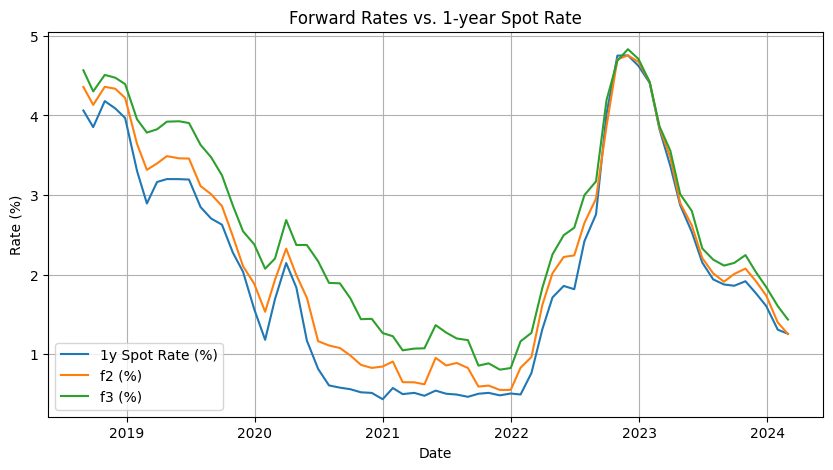

In [ ]:
plt.figure(figsize=(10,5))
# short_rate_dec
plt.plot(forward_rates_2.index, forward_rates_2['short_rate_dec']*100, label='1y Spot Rate (%)')
# f2, f3
plt.plot(forward_rates_2.index, forward_rates_2['f2']*100, label='f2 (%)')
plt.plot(forward_rates_2.index, forward_rates_2['f3']*100, label='f3 (%)')

plt.legend()
plt.title('Forward Rates vs. 1-year Spot Rate')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.grid(True)
plt.show()

# CASE 1: FORWARD RATES ONLY

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# --- 1. Chuẩn bị ---
feature_cols_case1 = ['PC1', 'PC2', 'PC3']
target_col = 'excess_return'

# --- 2. Chọn & dropna ---
df_case1 = df_trimmed[['Date'] + feature_cols_case1 + [target_col]].dropna()

# --- 3. Group theo Date (nếu cần) ---
df_case1 = df_case1.groupby('Date', as_index=True).mean()
df_case1.head()

,PC1,PC2,PC3,excess_return
Date,,,,
2018-08-31,6.358017,0.354041,-0.323050,0.067343
2018-09-28,6.293602,-0.221185,-0.105547,0.078143
2018-10-31,6.310909,0.155103,-0.080368,0.118681
2018-11-30,6.216055,0.121330,-0.063954,0.124672
2018-12-28,5.961151,0.047548,0.032834,0.129419


In [ ]:
# --- 4. Thống kê mô tả trước khi scale ---
desc = df_case1.describe()
print(desc.round(6).to_string())

             PC1        PC2        PC3  excess_return
count  67.000000  67.000000  67.000000      67.000000
mean    0.000000  -0.000000  -0.000000       0.049260
std     3.562686   1.074568   0.383717       0.115451
min    -4.332884  -1.405946  -1.204586      -0.226689
25%    -3.130322  -0.930948  -0.286194      -0.012142
50%    -1.126506  -0.181236   0.032834       0.063285
75%     3.066943   0.981013   0.277116       0.129935
max     6.358017   2.706935   0.908305       0.236230


In [ ]:
# Scale X, giữ y nguyên
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(df_case1[feature_cols_case1]),
    index=df_case1.index,
    columns=feature_cols_case1
)

# Gộp lại thành DataFrame
df_case1 = pd.concat([X_scaled, df_case1[[target_col]]], axis=1)
df_case1

,PC1,PC2,PC3,excess_return
Date,,,,
2018-08-31,1.798082,0.331959,-0.848251,0.067343
2018-09-28,1.779865,-0.207390,-0.277140,0.078143
2018-10-31,1.784760,0.145429,-0.211026,0.118681
2018-11-30,1.757935,0.113763,-0.167928,0.124672
2018-12-28,1.685846,0.044582,0.086214,0.129419
...,...,...,...,...
2023-10-31,-0.636088,0.608892,0.636530,0.026919
2023-11-30,-1.105182,1.065700,0.920531,-0.007821
2023-12-29,-1.225363,1.027508,0.717450,-0.037139


In [ ]:
# --- 2. Định nghĩa các mô hình ML cho Case 1 (bao gồm Gaussian Process) ---
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel

model_dict_case1 = {
    'PLS': PLSRegression(n_components=2),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GBRT': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'GaussianProcess_RBF': GaussianProcessRegressor(
    kernel=ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-12, 1e6)),
    n_restarts_optimizer=15,
    normalize_y=True,  # Thêm chuẩn hóa dữ liệu y
    random_state=42
)
}

In [ ]:
# Định nghĩa lại hàm expanding_window_forecast
def expanding_window_forecast(df, model, feature_cols, target_col, start_test):
    """
    Thực hiện dự báo với phương pháp expanding window.

    Parameters:
    -----------
    df : DataFrame
        DataFrame chứa features và target
    model : object
        Mô hình ML để dự báo
    feature_cols : list
        Danh sách tên cột features
    target_col : str
        Tên cột target
    start_test : datetime
        Ngày bắt đầu kiểm tra

    Returns:
    --------
    DataFrame
        DataFrame chứa kết quả dự báo
    """
    df_sorted = df.sort_index()
    preds = []

    # Tìm index của start_test
    try:
        start_test_idx = df_sorted.index.get_indexer([start_test], method='nearest')[0]
    except:
        # Nếu không tìm thấy exact match, lấy index đầu tiên ≥ start_test
        start_test_idx = df_sorted.index.searchsorted(start_test)

    for t in range(start_test_idx, len(df_sorted)):
        # Chia dữ liệu
        train_df = df_sorted.iloc[:t]
        test_df = df_sorted.iloc[[t]]

        # Huấn luyện mô hình
        model.fit(train_df[feature_cols], train_df[target_col])

        # Dự báo
        y_pred = model.predict(test_df[feature_cols])
        if isinstance(y_pred, np.ndarray) and y_pred.ndim > 1:
            y_pred = y_pred.flatten()

        # Lưu kết quả
        preds.append({
            'Date': df_sorted.index[t],
            'y_true': test_df[target_col].values[0],
            'y_pred': y_pred[0]
        })

    return pd.DataFrame(preds)

In [ ]:
# --- 3. Chạy đánh giá mô hình với expanding window cho Case 1 ---
results_case1 = []
start_test_date = pd.to_datetime('2020-01-31')

for name, model in model_dict_case1.items():
    print(f"Running model: {name}")

    # Xử lý đặc biệt cho Gaussian Process nếu dữ liệu quá lớn
    if 'GaussianProcess' in name and df_case1.shape[0] > 500:
        print(f"  Data too large for GP, sampling 500 points...")
        sample_indices = np.linspace(0, df_case1.shape[0]-1, 500, dtype=int)
        df_sample = df_case1.iloc[sample_indices]
        pred_df = expanding_window_forecast(df_sample, model, feature_cols_case1, target_col, start_test=start_test_date)
    else:
        pred_df = expanding_window_forecast(df_case1, model, feature_cols_case1, target_col, start_test=start_test_date)

    # Tính toán metrics
    mse_model = mean_squared_error(pred_df['y_true'], pred_df['y_pred'])
    rmse_model = np.sqrt(mse_model)  # Tính RMSE
    mae_model = mean_absolute_error(pred_df['y_true'], pred_df['y_pred'])
    mse_naive = mean_squared_error(pred_df['y_true'], [pred_df['y_true'].mean()] * len(pred_df))
    rmse_naive = np.sqrt(mse_naive)  # Tính RMSE cho mô hình naive
    r2_oos = 1 - mse_model / mse_naive

    # Lưu kết quả
    results_case1.append({
        'Model': name,
        'R2_oos': r2_oos,
        'RMSE': rmse_model,  # Thêm RMSE vào kết quả
        'MAE': mae_model
    })

# Tạo DataFrame kết quả và sắp xếp theo R2_oos
df_results_case1 = pd.DataFrame(results_case1).sort_values('R2_oos', ascending=False)
print("\nCase 1 Results (Forward Rates Only):")
df_results_case1

Running model: PLS
Running model: Ridge
Running model: Lasso
Running model: ElasticNet
Running model: RandomForest
Running model: GBRT
Running model: ExtraTrees
Running model: GaussianProcess_RBF

Case 1 Results (Forward Rates Only):


,Model,R2_oos,RMSE,MAE
6,ExtraTrees,0.709728,0.061158,0.041153
4,RandomForest,0.705590,0.061592,0.046219
5,GBRT,0.670472,0.065163,0.049609
7,GaussianProcess_RBF,0.559410,0.075348,0.053641
0,PLS,0.492861,0.080838,0.055355
1,Ridge,0.475777,0.082188,0.056932
3,ElasticNet,0.444275,0.084622,0.059974
2,Lasso,0.392688,0.088462,0.064244


In [ ]:
#df_results_case1.to_excel("df_results_case1.xlsx")
#from google.colab import files
#files.download("df_results_case1.xlsx")

# **CASE 2: FORWARD + MACRO**

In [ ]:
# --- 1. Chuẩn bị dữ liệu ---
# Đã có từ code trước
yield_factors = ['PC1', 'PC2', 'PC3']

macro_vars = [
    'iip', 'retail_sales_growth', 'cpi',
    'core_inflation',
    'policy_rate', 'interbank_rate', 'vnd/usd',
    'fdi_growth', 'vnindex_growth', 'gdp_growth'
]

feature_cols_case2 = yield_factors + macro_vars
target_col = 'excess_return'

# Lọc dữ liệu chỉ lấy các cột cần thiết
df_case2 = df_trimmed[['Date'] + feature_cols_case2 + [target_col]].dropna()

In [ ]:
# --- 2. Nhóm dữ liệu theo ngày và lấy giá trị trung bình ---
df_case2 = df_case2.groupby('Date', as_index=True).mean()
print("Số lượng dòng dữ liệu sau khi xử lý:", df_case2.shape[0])
df_case2.head()

# --- 3. Thống kê mô tả và chuẩn hóa dữ liệu ---
desc = df_case2.describe()
print(desc.round(6).to_string())

Số lượng dòng dữ liệu sau khi xử lý: 67
             PC1        PC2        PC3        iip  retail_sales_growth        cpi  core_inflation  policy_rate  interbank_rate    vnd/usd  fdi_growth  vnindex_growth  gdp_growth  excess_return
count  67.000000  67.000000  67.000000  67.000000            67.000000  67.000000       67.000000    67.000000       67.000000  67.000000   67.000000       67.000000   67.000000      67.000000
mean    0.000000  -0.000000  -0.000000   5.697015             8.444776   2.941194        2.328507     4.973881        3.618358   0.427797   17.361194        0.631194    5.244030       0.049260
std     3.562686   1.074568   0.383717   7.329392            13.807708   1.197535        1.321934     0.951608        1.923714   0.008915   39.977835        6.670135    3.043996       0.115451
min    -4.332884  -1.405946  -1.204586 -14.900000           -33.700000  -0.970000        0.490000     4.000000        1.220000   0.402200  -94.000000      -24.900000   -6.170000      -0.22

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(df_case2[feature_cols_case2]),
    index=df_case2.index,
    columns=feature_cols_case2
)

# Ghép lại thành DataFrame
df_case2 = pd.concat([X_scaled, df_case2[[target_col]]], axis=1)
df_case2.head()

,PC1,PC2,PC3,iip,retail_sales_growth,cpi,core_inflation,policy_rate,interbank_rate,vnd/usd,fdi_growth,vnindex_growth,gdp_growth,excess_return
Date,,,,,,,,,,,,,,
2018-08-31,1.798082,0.331959,-0.848251,1.058904,0.303206,0.874001,-0.600982,1.351135,0.556036,0.135951,-0.079670,0.428812,0.531568,0.067343
2018-09-28,1.779865,-0.207390,-0.277140,0.467797,0.295909,0.874001,-0.547630,1.351135,0.409386,0.090748,0.011059,0.326095,0.541498,0.078143
2018-10-31,1.784760,0.145429,-0.211026,0.275344,0.288612,0.798279,-0.501899,1.351135,0.618886,0.056842,-0.084711,-1.614942,0.588940,0.118681
2018-11-30,1.757935,0.113763,-0.167928,0.536530,0.274018,0.436498,-0.463790,1.351135,0.786487,0.113349,-0.203163,0.099515,0.636383,0.124672
2018-12-28,1.685846,0.044582,0.086214,0.783970,0.310503,0.032649,-0.479034,1.351135,0.812674,0.361976,-0.039346,-0.649710,0.683826,0.129419


In [ ]:
# --- 4. Định nghĩa các mô hình ML ---
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel

model_dict_case2 = {
    'PLS': PLSRegression(n_components=2),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GBRT': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'GaussianProcess_RBF': GaussianProcessRegressor(
    kernel=ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-12, 1e6)),
    n_restarts_optimizer=15,
    normalize_y=True,  # Thêm chuẩn hóa dữ liệu y
    random_state=42
)
}

# --- 5. Chạy đánh giá mô hình với expanding window ---
results_case2 = []
start_test_date = pd.to_datetime('2020-01-31')

for name, model in model_dict_case2.items():
    print(f"Running model: {name}")

    # Xử lý đặc biệt cho Gaussian Process nếu dữ liệu quá lớn
    if 'GaussianProcess' in name and df_case2.shape[0] > 500:
        print(f"  Data too large for GP, sampling 500 points...")
        sample_indices = np.linspace(0, df_case2.shape[0]-1, 500, dtype=int)
        df_sample = df_case2.iloc[sample_indices]
        pred_df = expanding_window_forecast(df_sample, model, feature_cols_case2, target_col, start_test=start_test_date)
    else:
        pred_df = expanding_window_forecast(df_case2, model, feature_cols_case2, target_col, start_test=start_test_date)
    # Tính toán metrics
    mse_model = mean_squared_error(pred_df['y_true'], pred_df['y_pred'])
    rmse_model = np.sqrt(mse_model)  # Tính RMSE
    mae_model = mean_absolute_error(pred_df['y_true'], pred_df['y_pred'])
    mse_naive = mean_squared_error(pred_df['y_true'], [pred_df['y_true'].mean()] * len(pred_df))
    rmse_naive = np.sqrt(mse_naive)  # Tính RMSE cho mô hình naive
    r2_oos = 1 - mse_model / mse_naive

    # Lưu kết quả
    results_case2.append({
        'Model': name,
        'R2_oos': r2_oos,
        'RMSE': rmse_model,  # Thêm RMSE vào kết quả
        'MAE': mae_model
    })

# Tạo DataFrame kết quả và sắp xếp theo R2_oos
df_results_case2 = pd.DataFrame(results_case2).sort_values('R2_oos', ascending=False)
df_results_case2

Running model: PLS
Running model: Ridge
Running model: Lasso
Running model: ElasticNet
Running model: RandomForest
Running model: GBRT
Running model: ExtraTrees
Running model: GaussianProcess_RBF


,Model,R2_oos,RMSE,MAE
6,ExtraTrees,0.843064,0.044969,0.035174
5,GBRT,0.797920,0.051029,0.040741
4,RandomForest,0.762371,0.055335,0.044663
7,GaussianProcess_RBF,0.679346,0.064279,0.053687
0,PLS,0.565999,0.074782,0.060872
1,Ridge,0.557330,0.075525,0.058119
3,ElasticNet,0.518833,0.078741,0.064533
2,Lasso,0.486600,0.081335,0.063809


In [ ]:
#df_results_case2.to_excel("df_results_case2.xlsx")
#from google.colab import files
#files.download("df_results_case2.xlsx")

In [ ]:
# Biểu đồ so sánh giá trị dự báo và giá trị thực

# 1. Chọn mô hình có hiệu suất tốt nhất từ Case 2
best_model_name = df_results_case2.iloc[0]['Model']
if best_model_name in model_dict_case2:
    best_model = model_dict_case2[best_model_name]
else:
    # Nếu không tìm thấy, lấy mô hình đầu tiên
    best_model_name = next(iter(model_dict_case2))
    best_model = model_dict_case2[best_model_name]

print(f"Đang sử dụng mô hình: {best_model_name}")

# 2. Thực hiện dự báo trên dữ liệu kiểm tra
# Giả sử chúng ta bắt đầu từ 2020-01-31
start_test_date = pd.to_datetime('2020-01-31')
test_mask = df_case2.index >= start_test_date

X_test = df_case2[feature_cols_case2].loc[test_mask]
y_test = df_case2[target_col].loc[test_mask]

# Huấn luyện lại mô hình trên dữ liệu trước ngày bắt đầu kiểm tra
train_mask = df_case2.index < start_test_date
X_train = df_case2[feature_cols_case2].loc[train_mask]
y_train = df_case2[target_col].loc[train_mask]

best_model.fit(X_train, y_train)

# Dự báo
y_pred = best_model.predict(X_test)

# 3. Tạo DataFrame kết quả
result_df = pd.DataFrame({
    'Date': df_case2.index[test_mask],
    'Actual': y_test,
    'Predicted': y_pred
})

# Tính các sai số
result_df['Error'] = result_df['Actual'] - result_df['Predicted']
result_df['AbsError'] = np.abs(result_df['Error'])

# 7. Bảng thống kê hiệu suất
rmse = np.sqrt(np.mean(result_df['Error'] ** 2))
mae = np.mean(result_df['AbsError'])
r2 = 1 - np.sum(result_df['Error'] ** 2) / np.sum((result_df['Actual'] - result_df['Actual'].mean()) ** 2)

print("\nThống kê hiệu suất trên tập kiểm tra:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 8. Hiển thị một bảng nhỏ với các giá trị thực và dự báo
print("\nMẫu giá trị thực vs. dự báo:")
sample_result = result_df.sample(min(10, len(result_df))).sort_index()
print(sample_result[['Date', 'Actual', 'Predicted', 'Error']].round(4))

Đang sử dụng mô hình: ExtraTrees

Thống kê hiệu suất trên tập kiểm tra:
RMSE: 0.1594
MAE: 0.1285
R²: -0.9729

Mẫu giá trị thực vs. dự báo:
                 Date  Actual  Predicted   Error
Date                                            
2020-06-30 2020-06-30  0.0868     0.1243 -0.0375
2020-07-31 2020-07-31  0.0633     0.1304 -0.0671
2020-10-30 2020-10-30  0.0555     0.1417 -0.0862
2021-04-29 2021-04-29 -0.0267     0.1277 -0.1544
2021-07-30 2021-07-30 -0.0848     0.1380 -0.2228
2021-08-31 2021-08-31 -0.1138     0.1265 -0.2403
2021-09-30 2021-09-30 -0.2037     0.1367 -0.3404
2023-02-28 2023-02-28  0.1852     0.1047  0.0805
2023-04-28 2023-04-28  0.0524     0.1277 -0.0753
2023-07-31 2023-07-31 -0.0129     0.1243 -0.1372


In [64]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

# Giả sử đã có df_case1 với các features và target như trong file PDF
# feature_cols_case1 = ['PC1', 'PC2', 'PC3']
# target_col = 'excess_return'

# 1. Chức năng để thực hiện expanding window forecast với hyperparameters tùy chỉnh
def expanding_window_forecast(df, model, feature_cols, target_col, start_test,
                              model_params=None):
    """
    Thực hiện dự báo bằng phương pháp expanding window với hyperparameters tùy chỉnh

    Parameters:
    -----------
    df : DataFrame
        DataFrame chứa features và target
    model : object
        Đối tượng mô hình để huấn luyện
    feature_cols : list
        Danh sách tên các cột features
    target_col : str
        Tên cột target
    start_test : datetime
        Ngày bắt đầu kiểm tra
    model_params : dict, optional
        Hyperparameters cho mô hình

    Returns:
    --------
    pd.DataFrame
        DataFrame chứa kết quả dự báo
    """
    df_sorted = df.sort_index()
    preds = []

    # Tìm index của ngày bắt đầu kiểm tra
    try:
        start_test_idx = df_sorted.index.get_indexer([start_test], method='nearest')[0]
    except:
        # Nếu không tìm thấy exact match, lấy index đầu tiên ≥ start_test
        start_test_idx = df_sorted.index.searchsorted(start_test)

    for t in range(start_test_idx, len(df_sorted)):
        # Chia dữ liệu
        train_df = df_sorted.iloc[:t]
        test_df = df_sorted.iloc[t:t+1]

        # Huấn luyện mô hình
        if model_params:
            model_instance = model(**model_params)
        else:
            model_instance = model()

        model_instance.fit(train_df[feature_cols], train_df[target_col])

        # Dự báo
        y_pred = model_instance.predict(test_df[feature_cols])

        # Lưu kết quả
        preds.append({
            'Date': df_sorted.index[t],
            'y_true': test_df[target_col].values[0],
            'y_pred': y_pred[0]
        })

    return pd.DataFrame(preds)

# 2. Định nghĩa các bộ hyperparameters để chống overfitting cho 4 mô hình

# Chuẩn bị dữ liệu
# Giả sử X_scaled là dữ liệu đã được StandardScaler biến đổi
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(df_case1[feature_cols_case1]),
    index=df_case1.index,
    columns=feature_cols_case1
)
df_case1_scaled = pd.concat([X_scaled, df_case1[target_col]], axis=1)

# Ngày bắt đầu kiểm tra (giả sử là '2020-01-31' như trong file PDF)
start_test_date = pd.to_datetime('2020-01-31')

# 3. Điều chỉnh hyperparameters cho từng mô hình để chống overfitting

# 3.1 RandomForest với các hyperparameters chống overfitting
rf_params_anti_overfit = {
    'n_estimators': 100,          # Giảm số lượng cây (mặc định là 100)
    'max_depth': 3,               # Giảm độ sâu tối đa (mặc định là None - không giới hạn)
    'min_samples_split': 5,       # Tăng số lượng mẫu tối thiểu để phân tách (mặc định là 2)
    'min_samples_leaf': 4,        # Tăng số lượng mẫu tối thiểu ở nút lá (mặc định là 1)
    'max_features': 'sqrt',       # Giới hạn số lượng features được xem xét (mặc định là 'auto')
    'bootstrap': True,            # Sử dụng bootstrap (mặc định là True)
    'random_state': 42            # Đảm bảo kết quả có thể tái tạo
}

results_rf = expanding_window_forecast(
    df_case1_scaled,
    RandomForestRegressor,
    feature_cols_case1,
    target_col,
    start_test_date,
    rf_params_anti_overfit
)

# 3.2 GradientBoosting với các hyperparameters chống overfitting
gb_params_anti_overfit = {
    'n_estimators': 50,           # Giảm số lượng cây (mặc định là 100)
    'learning_rate': 0.01,        # Giảm learning rate (mặc định là 0.1)
    'max_depth': 2,               # Giảm độ sâu tối đa (mặc định là 3)
    'min_samples_split': 5,       # Tăng số lượng mẫu tối thiểu để phân tách (mặc định là 2)
    'min_samples_leaf': 4,        # Tăng số lượng mẫu tối thiểu ở nút lá (mặc định là 1)
    'subsample': 0.8,             # Sử dụng 80% dữ liệu cho mỗi cây (mặc định là 1.0)
    'max_features': 'sqrt',       # Giới hạn số lượng features được xem xét
    'random_state': 42            # Đảm bảo kết quả có thể tái tạo
}

results_gb = expanding_window_forecast(
    df_case1_scaled,
    GradientBoostingRegressor,
    feature_cols_case1,
    target_col,
    start_test_date,
    gb_params_anti_overfit
)

# 3.3 ExtraTrees với các hyperparameters chống overfitting
et_params_anti_overfit = {
    'n_estimators': 100,          # Giảm số lượng cây (mặc định là 100)
    'max_depth': 3,               # Giảm độ sâu tối đa (mặc định là None - không giới hạn)
    'min_samples_split': 5,       # Tăng số lượng mẫu tối thiểu để phân tách (mặc định là 2)
    'min_samples_leaf': 4,        # Tăng số lượng mẫu tối thiểu ở nút lá (mặc định là 1)
    'max_features': 'sqrt',       # Giới hạn số lượng features được xem xét
    'bootstrap': True,            # Sử dụng bootstrap (mặc định là False)
    'random_state': 42            # Đảm bảo kết quả có thể tái tạo
}

results_et = expanding_window_forecast(
    df_case1_scaled,
    ExtraTreesRegressor,
    feature_cols_case1,
    target_col,
    start_test_date,
    et_params_anti_overfit
)

# 3.4 GaussianProcess với các hyperparameters chống overfitting
# Tạo kernel phù hợp với hyperparameters
gp_kernel = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1))

gp_params_anti_overfit = {
    'kernel': gp_kernel,
    'alpha': 0.0,                 # Numerical value added to the diagonal of the kernel matrix (tiếng Anh)
    'normalize_y': True,          # Chuẩn hóa target
    'n_restarts_optimizer': 5,    # Số lần khởi động lại quá trình tối ưu hóa
    'random_state': 42            # Đảm bảo kết quả có thể tái tạo
}

results_gp = expanding_window_forecast(
    df_case1_scaled,
    GaussianProcessRegressor,
    feature_cols_case1,
    target_col,
    start_test_date,
    gp_params_anti_overfit
)

# 4. Đánh giá hiệu suất của các mô hình đã điều chỉnh
def evaluate_model(results, model_name):
    """
    Đánh giá hiệu suất của mô hình

    Parameters:
    -----------
    results : DataFrame
        DataFrame chứa kết quả dự báo
    model_name : str
        Tên mô hình

    Returns:
    --------
    dict
        Dictionary chứa các metrics
    """
    mse = mean_squared_error(results['y_true'], results['y_pred'])
    rmse = np.sqrt(mse)
    r2 = r2_score(results['y_true'], results['y_pred'])

    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.6f}")
    print(f"R²: {r2:.6f}")
    print("-" * 40)

    return {
        'Model': model_name,
        'RMSE': rmse,
        'R2': r2
    }

# Đánh giá các mô hình
rf_metrics = evaluate_model(results_rf, "RandomForest (Anti-Overfit)")
gb_metrics = evaluate_model(results_gb, "GradientBoosting (Anti-Overfit)")
et_metrics = evaluate_model(results_et, "ExtraTrees (Anti-Overfit)")
gp_metrics = evaluate_model(results_gp, "GaussianProcess (Anti-Overfit)")

# 5. So sánh kết quả với mô hình ban đầu
# Nếu đã có kết quả từ mô hình ban đầu, hãy so sánh chúng ở đây

# Tạo DataFrame tổng hợp kết quả
results_summary = pd.DataFrame([
    rf_metrics,
    gb_metrics,
    et_metrics,
    gp_metrics
])

print("\nSummary of Models Performance:")
print(results_summary)

# 6. Kết hợp các mô hình theo một ensemble đơn giản (lấy trung bình)
all_results = pd.DataFrame({
    'Date': results_rf['Date'],
    'y_true': results_rf['y_true'],
    'RF_pred': results_rf['y_pred'],
    'GB_pred': results_gb['y_pred'],
    'ET_pred': results_et['y_pred'],
    'GP_pred': results_gp['y_pred']
})

all_results['ensemble_pred'] = all_results[['RF_pred', 'GB_pred', 'ET_pred', 'GP_pred']].mean(axis=1)

# Đánh giá mô hình ensemble
ensemble_metrics = {
    'Model': 'Simple Ensemble (Mean)',
    'RMSE': np.sqrt(mean_squared_error(all_results['y_true'], all_results['ensemble_pred'])),
    'R2': r2_score(all_results['y_true'], all_results['ensemble_pred'])
}

print("\nEnsemble Model Performance:")
print(f"RMSE: {ensemble_metrics['RMSE']:.6f}")
print(f"R²: {ensemble_metrics['R2']:.6f}")

# Thêm kết quả ensemble vào summary
results_summary = pd.concat([results_summary, pd.DataFrame([ensemble_metrics])])
print("\nFinal Summary of All Models Performance:")
print(results_summary)

Model: RandomForest (Anti-Overfit)
RMSE: 0.091824
R²: 0.345653
----------------------------------------
Model: GradientBoosting (Anti-Overfit)
RMSE: 0.116746
R²: -0.057747
----------------------------------------
Model: ExtraTrees (Anti-Overfit)
RMSE: 0.114086
R²: -0.010093
----------------------------------------
Model: GaussianProcess (Anti-Overfit)
RMSE: 0.075348
R²: 0.559410
----------------------------------------

Summary of Models Performance:
                             Model      RMSE        R2
0      RandomForest (Anti-Overfit)  0.091824  0.345653
1  GradientBoosting (Anti-Overfit)  0.116746 -0.057747
2        ExtraTrees (Anti-Overfit)  0.114086 -0.010093
3   GaussianProcess (Anti-Overfit)  0.075348  0.559410

Ensemble Model Performance:
RMSE: 0.097704
R²: 0.259164

Final Summary of All Models Performance:
                             Model      RMSE        R2
0      RandomForest (Anti-Overfit)  0.091824  0.345653
1  GradientBoosting (Anti-Overfit)  0.116746 -0.057747
2     

In [66]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Hàm xử lý outliers sử dụng phương pháp Winsorization
def handle_outliers_winsorize(df, columns, limits=(0.05, 0.95)):
    """
    Xử lý outliers bằng phương pháp Winsorization

    Parameters:
    -----------
    df : DataFrame
        DataFrame cần xử lý
    columns : list
        Danh sách cột cần xử lý outliers
    limits : tuple, optional
        Giới hạn dưới và trên của phân vị, mặc định là (0.05, 0.95)

    Returns:
    --------
    DataFrame
        DataFrame sau khi đã xử lý outliers
    """
    df_clean = df.copy()

    for col in columns:
        if col in df.columns:
            lower_limit = df[col].quantile(limits[0])
            upper_limit = df[col].quantile(limits[1])

            # Winsorize: thay thế giá trị cực đoan bằng phân vị
            df_clean[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

            # In thông tin về số lượng outliers được xử lý
            n_lower = (df[col] < lower_limit).sum()
            n_upper = (df[col] > upper_limit).sum()
            if n_lower > 0 or n_upper > 0:
                print(f"Cột {col}: Đã xử lý {n_lower} outliers dưới và {n_upper} outliers trên")

    return df_clean

# Hàm xử lý outliers sử dụng phương pháp IQR
def handle_outliers_iqr(df, columns, k=1.5):
    """
    Xử lý outliers bằng phương pháp IQR

    Parameters:
    -----------
    df : DataFrame
        DataFrame cần xử lý
    columns : list
        Danh sách cột cần xử lý outliers
    k : float, optional
        Hệ số để xác định outliers, mặc định là 1.5

    Returns:
    --------
    DataFrame
        DataFrame sau khi đã xử lý outliers
    """
    df_clean = df.copy()

    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - k * IQR
            upper_bound = Q3 + k * IQR

            # Cắt ngọn các giá trị nằm ngoài khoảng
            df_clean[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

            # In thông tin về số lượng outliers được xử lý
            n_lower = (df[col] < lower_bound).sum()
            n_upper = (df[col] > upper_bound).sum()
            if n_lower > 0 or n_upper > 0:
                print(f"Cột {col}: Đã xử lý {n_lower} outliers dưới và {n_upper} outliers trên")

    return df_clean

# Hàm tính khoảng cách Mahalanobis thủ công
def calculate_mahalanobis(x, mean, inv_cov):
    """
    Tính khoảng cách Mahalanobis thủ công

    Parameters:
    -----------
    x : array-like
        Vector cần tính khoảng cách
    mean : array-like
        Vector trung bình
    inv_cov : array-like
        Ma trận nghịch đảo của ma trận hiệp phương sai

    Returns:
    --------
    float
        Khoảng cách Mahalanobis
    """
    diff = x - mean
    return np.sqrt(diff.dot(inv_cov).dot(diff.T))

# Kết hợp nhiều phương pháp xử lý outliers dựa trên đặc tính dữ liệu
def handle_outliers_combined(df, feature_cols, target_col):
    """
    Xử lý outliers kết hợp nhiều phương pháp dựa trên đặc tính dữ liệu

    Parameters:
    -----------
    df : DataFrame
        DataFrame cần xử lý
    feature_cols : list
        Danh sách cột features
    target_col : str
        Tên cột target

    Returns:
    --------
    DataFrame
        DataFrame sau khi đã xử lý outliers
    """
    df_clean = df.copy()

    # 1. Xử lý outliers trong các features bằng phương pháp IQR
    # Với dữ liệu tài chính, IQR thường phù hợp hơn cho features
    df_clean = handle_outliers_iqr(df_clean, feature_cols, k=2.0)

    # 2. Xử lý outliers trong target bằng phương pháp Winsorization
    # Với biến target như 'excess_return', Winsorization thường tốt hơn
    # vì giữ lại xu hướng của các giá trị cực đoan hơn là cắt ngọn
    df_clean = handle_outliers_winsorize(df_clean, [target_col], limits=(0.01, 0.99))

    # 3. Xử lý các outliers đa biến bằng cách kiểm tra khoảng cách Mahalanobis
    # Phương pháp này giúp phát hiện các outliers không hiển thị rõ trong một biến đơn lẻ
    if len(feature_cols) > 1:  # Chỉ áp dụng nếu có nhiều hơn 1 feature
        try:
            X = df_clean[feature_cols]

            # Tính toán khoảng cách Mahalanobis thủ công
            X_mean = X.mean().values
            cov = X.cov().values

            # Kiểm tra xem ma trận hiệp phương sai có thể đảo ngược không
            try:
                inv_cov = np.linalg.inv(cov)

                mahalanobis_dist = []
                for i in range(len(X)):
                    x = X.iloc[i].values
                    dist = calculate_mahalanobis(x, X_mean, inv_cov)
                    mahalanobis_dist.append(dist)

                # Phát hiện outliers dựa trên phân phối chi-square
                degrees_of_freedom = len(feature_cols)
                outlier_threshold = stats.chi2.ppf(0.999, degrees_of_freedom)

                # Đánh dấu và xử lý các outliers đa biến
                outlier_indices = np.where(np.array(mahalanobis_dist) > outlier_threshold)[0]

                if len(outlier_indices) > 0:
                    print(f"Phát hiện {len(outlier_indices)} outliers đa biến")

                    # Lấy các dòng không phải outliers
                    non_outlier_indices = np.where(np.array(mahalanobis_dist) <= outlier_threshold)[0]

                    # Đối với outliers đa biến, chúng ta có thể áp dụng kỹ thuật giảm tác động
                    # bằng cách đặt trọng số thấp hơn cho các mẫu này, hoặc loại bỏ chúng
                    # Ở đây, chúng ta sẽ thay thế giá trị của chúng bằng giá trị trung bình không phải outlier
                    for col in feature_cols:
                        non_outlier_mean = df_clean.iloc[non_outlier_indices][col].mean()
                        df_clean.loc[df_clean.index[outlier_indices], col] = non_outlier_mean
            except np.linalg.LinAlgError:
                print("Không thể đảo ngược ma trận hiệp phương sai. Bỏ qua phát hiện outliers đa biến.")
        except Exception as e:
            print(f"Lỗi khi xử lý outliers đa biến: {e}")
            # Tiếp tục với dữ liệu đã được xử lý bằng các phương pháp khác

    return df_clean

# Hàm thực hiện expanding window forecast với hyperparameters tùy chỉnh
def expanding_window_forecast(df, model, feature_cols, target_col, start_test,
                              model_params=None):
    """
    Thực hiện dự báo bằng phương pháp expanding window với hyperparameters tùy chỉnh

    Parameters:
    -----------
    df : DataFrame
        DataFrame chứa features và target
    model : object
        Đối tượng mô hình để huấn luyện
    feature_cols : list
        Danh sách tên các cột features
    target_col : str
        Tên cột target
    start_test : datetime
        Ngày bắt đầu kiểm tra
    model_params : dict, optional
        Hyperparameters cho mô hình

    Returns:
    --------
    pd.DataFrame
        DataFrame chứa kết quả dự báo
    """
    df_sorted = df.sort_index()
    preds = []

    # Tìm index của ngày bắt đầu kiểm tra
    try:
        start_test_idx = df_sorted.index.get_indexer([start_test], method='nearest')[0]
    except:
        # Nếu không tìm thấy exact match, lấy index đầu tiên ≥ start_test
        start_test_idx = df_sorted.index.searchsorted(start_test)

    for t in range(start_test_idx, len(df_sorted)):
        # Chia dữ liệu
        train_df = df_sorted.iloc[:t]
        test_df = df_sorted.iloc[t:t+1]

        # Huấn luyện mô hình
        if model_params:
            model_instance = model(**model_params)
        else:
            model_instance = model()

        model_instance.fit(train_df[feature_cols], train_df[target_col])

        # Dự báo
        y_pred = model_instance.predict(test_df[feature_cols])

        # Lưu kết quả
        preds.append({
            'Date': df_sorted.index[t],
            'y_true': test_df[target_col].values[0],
            'y_pred': y_pred[0]
        })

    return pd.DataFrame(preds)

# Đánh giá hiệu suất của mô hình
def evaluate_model(results, model_name):
    """
    Đánh giá hiệu suất của mô hình

    Parameters:
    -----------
    results : DataFrame
        DataFrame chứa kết quả dự báo
    model_name : str
        Tên mô hình

    Returns:
    --------
    dict
        Dictionary chứa các metrics
    """
    mse = mean_squared_error(results['y_true'], results['y_pred'])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(results['y_true'], results['y_pred'])
    r2 = r2_score(results['y_true'], results['y_pred'])

    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.6f}")
    print(f"MAE: {mae:.6f}")
    print(f"R²: {r2:.6f}")
    print("-" * 40)

    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Giả sử đã có df_case1 với các features và target như trong file PDF
# Định nghĩa các biến cần thiết (bạn cần thay thế bằng các giá trị thực tế)
feature_cols_case1 = ['PC1', 'PC2', 'PC3']
target_col = 'excess_return'

# BƯỚC 1: Xử lý outliers
print("BƯỚC 1: XỬ LÝ OUTLIERS")
print("-" * 40)

# Thực hiện xử lý outliers
df_case1_clean = handle_outliers_combined(df_case1, feature_cols_case1, target_col)

# Chuẩn hóa dữ liệu sau khi xử lý outliers
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(df_case1_clean[feature_cols_case1]),
    index=df_case1_clean.index,
    columns=feature_cols_case1
)
df_case1_clean_scaled = pd.concat([X_scaled, df_case1_clean[target_col]], axis=1)

# BƯỚC 2: Điều chỉnh hyperparameters để chống overfitting
print("\nBƯỚC 2: ĐIỀU CHỈNH HYPERPARAMETERS")
print("-" * 40)

# Ngày bắt đầu kiểm tra (giả sử là '2020-01-31' như trong file PDF)
start_test_date = pd.to_datetime('2020-01-31')

# RandomForest với các hyperparameters chống overfitting
rf_params_anti_overfit = {
    'n_estimators': 100,          # Giảm số lượng cây (mặc định là 100)
    'max_depth': 3,               # Giảm độ sâu tối đa (mặc định là None - không giới hạn)
    'min_samples_split': 5,       # Tăng số lượng mẫu tối thiểu để phân tách (mặc định là 2)
    'min_samples_leaf': 4,        # Tăng số lượng mẫu tối thiểu ở nút lá (mặc định là 1)
    'max_features': 'sqrt',       # Giới hạn số lượng features được xem xét (mặc định là 'auto')
    'bootstrap': True,            # Sử dụng bootstrap (mặc định là True)
    'random_state': 42            # Đảm bảo kết quả có thể tái tạo
}

results_rf = expanding_window_forecast(
    df_case1_clean_scaled,
    RandomForestRegressor,
    feature_cols_case1,
    target_col,
    start_test_date,
    rf_params_anti_overfit
)

# GradientBoosting với các hyperparameters chống overfitting
gb_params_anti_overfit = {
    'n_estimators': 50,           # Giảm số lượng cây (mặc định là 100)
    'learning_rate': 0.01,        # Giảm learning rate (mặc định là 0.1)
    'max_depth': 2,               # Giảm độ sâu tối đa (mặc định là 3)
    'min_samples_split': 5,       # Tăng số lượng mẫu tối thiểu để phân tách (mặc định là 2)
    'min_samples_leaf': 4,        # Tăng số lượng mẫu tối thiểu ở nút lá (mặc định là 1)
    'subsample': 0.8,             # Sử dụng 80% dữ liệu cho mỗi cây (mặc định là 1.0)
    'max_features': 'sqrt',       # Giới hạn số lượng features được xem xét
    'random_state': 42            # Đảm bảo kết quả có thể tái tạo
}

results_gb = expanding_window_forecast(
    df_case1_clean_scaled,
    GradientBoostingRegressor,
    feature_cols_case1,
    target_col,
    start_test_date,
    gb_params_anti_overfit
)

# ExtraTrees với các hyperparameters chống overfitting
et_params_anti_overfit = {
    'n_estimators': 100,          # Giảm số lượng cây (mặc định là 100)
    'max_depth': 3,               # Giảm độ sâu tối đa (mặc định là None - không giới hạn)
    'min_samples_split': 5,       # Tăng số lượng mẫu tối thiểu để phân tách (mặc định là 2)
    'min_samples_leaf': 4,        # Tăng số lượng mẫu tối thiểu ở nút lá (mặc định là 1)
    'max_features': 'sqrt',       # Giới hạn số lượng features được xem xét
    'bootstrap': True,            # Sử dụng bootstrap (mặc định là False)
    'random_state': 42            # Đảm bảo kết quả có thể tái tạo
}

results_et = expanding_window_forecast(
    df_case1_clean_scaled,
    ExtraTreesRegressor,
    feature_cols_case1,
    target_col,
    start_test_date,
    et_params_anti_overfit
)

# GaussianProcess với các hyperparameters chống overfitting
# Tạo kernel phù hợp với hyperparameters
gp_kernel = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1))

gp_params_anti_overfit = {
    'kernel': gp_kernel,
    'alpha': 0.01,                # Thêm regularization
    'normalize_y': True,          # Chuẩn hóa target
    'n_restarts_optimizer': 5,    # Số lần khởi động lại quá trình tối ưu hóa
    'random_state': 42            # Đảm bảo kết quả có thể tái tạo
}

results_gp = expanding_window_forecast(
    df_case1_clean_scaled,
    GaussianProcessRegressor,
    feature_cols_case1,
    target_col,
    start_test_date,
    gp_params_anti_overfit
)

# BƯỚC 3: Đánh giá hiệu suất của các mô hình đã điều chỉnh
print("\nBƯỚC 3: ĐÁNH GIÁ HIỆU SUẤT")
print("-" * 40)

rf_metrics = evaluate_model(results_rf, "RandomForest (Anti-Overfit)")
gb_metrics = evaluate_model(results_gb, "GradientBoosting (Anti-Overfit)")
et_metrics = evaluate_model(results_et, "ExtraTrees (Anti-Overfit)")
gp_metrics = evaluate_model(results_gp, "GaussianProcess (Anti-Overfit)")

# BƯỚC 4: Kết hợp các mô hình trong ensemble
print("\nBƯỚC 4: KẾT HỢP MÔ HÌNH")
print("-" * 40)

all_results = pd.DataFrame({
    'Date': results_rf['Date'],
    'y_true': results_rf['y_true'],
    'RF_pred': results_rf['y_pred'],
    'GB_pred': results_gb['y_pred'],
    'ET_pred': results_et['y_pred'],
    'GP_pred': results_gp['y_pred']
})

# Lấy trung bình dự đoán của các mô hình (ensemble đơn giản)
all_results['ensemble_pred'] = all_results[['RF_pred', 'GB_pred', 'ET_pred', 'GP_pred']].mean(axis=1)

# Đánh giá mô hình ensemble
ensemble_metrics = {
    'Model': 'Simple Ensemble (Mean)',
    'RMSE': np.sqrt(mean_squared_error(all_results['y_true'], all_results['ensemble_pred'])),
    'MAE': mean_absolute_error(all_results['y_true'], all_results['ensemble_pred']),
    'R2': r2_score(all_results['y_true'], all_results['ensemble_pred'])
}

print("\nEnsemble Model Performance:")
print(f"RMSE: {ensemble_metrics['RMSE']:.6f}")
print(f"MAE: {ensemble_metrics['MAE']:.6f}")
print(f"R²: {ensemble_metrics['R2']:.6f}")

# Tạo DataFrame tổng hợp kết quả
results_summary = pd.DataFrame([
    rf_metrics,
    gb_metrics,
    et_metrics,
    gp_metrics,
    ensemble_metrics
])

print("\nTổng hợp hiệu suất của tất cả các mô hình:")
print(results_summary[['Model', 'RMSE', 'MAE', 'R2']].sort_values('R2', ascending=False))

# BƯỚC 5: So sánh với mô hình ban đầu (nếu có)
# Định nghĩa original_metrics giả định (bạn sẽ thay thế bằng giá trị thực)
original_metrics = {
    'Model': 'Original Stacking Ensemble',
    'RMSE': np.sqrt(0.004584),  # Từ kết quả đầu tiên: Test MSE: 0.004584
    'R2': 0.2456  # Từ kết quả đầu tiên: Test R²: 0.2456
}

print("\nBƯỚC 5: SO SÁNH VỚI MÔ HÌNH BAN ĐẦU")
print("-" * 40)

# Tính toán mức độ cải thiện
improvement_r2 = (ensemble_metrics['R2'] - original_metrics['R2']) / original_metrics['R2'] * 100
improvement_rmse = (original_metrics['RMSE'] - ensemble_metrics['RMSE']) / original_metrics['RMSE'] * 100

print(f"Cải thiện R² so với mô hình ban đầu: {improvement_r2:.2f}%")
print(f"Cải thiện RMSE so với mô hình ban đầu: {improvement_rmse:.2f}%")

# So sánh chi tiết
comparison_df = pd.DataFrame([
    original_metrics,
    ensemble_metrics
])

print("\nSo sánh chi tiết:")
print(comparison_df[['Model', 'RMSE', 'R2']])

BƯỚC 1: XỬ LÝ OUTLIERS
----------------------------------------
Cột excess_return: Đã xử lý 1 outliers dưới và 1 outliers trên

BƯỚC 2: ĐIỀU CHỈNH HYPERPARAMETERS
----------------------------------------

BƯỚC 3: ĐÁNH GIÁ HIỆU SUẤT
----------------------------------------
Model: RandomForest (Anti-Overfit)
RMSE: 0.091365
MAE: 0.068098
R²: 0.343400
----------------------------------------
Model: GradientBoosting (Anti-Overfit)
RMSE: 0.116225
MAE: 0.092382
R²: -0.062522
----------------------------------------
Model: ExtraTrees (Anti-Overfit)
RMSE: 0.113556
MAE: 0.090973
R²: -0.014288
----------------------------------------
Model: GaussianProcess (Anti-Overfit)
RMSE: 0.074933
MAE: 0.053525
R²: 0.558347
----------------------------------------

BƯỚC 4: KẾT HỢP MÔ HÌNH
----------------------------------------

Ensemble Model Performance:
RMSE: 0.097230
MAE: 0.073847
R²: 0.256400

Tổng hợp hiệu suất của tất cả các mô hình:
                             Model      RMSE       MAE        R2
3 

In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Hàm xử lý outliers cơ bản (để áp dụng trước feature selection)
def handle_outliers_iqr(df, columns, k=1.5):
    """
    Xử lý outliers bằng phương pháp IQR
    """
    df_clean = df.copy()

    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - k * IQR
            upper_bound = Q3 + k * IQR

            df_clean[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df_clean

# Thực hiện feature selection dựa trên feature importance
def select_features_importance(df, feature_cols, target_col, threshold='median'):
    """
    Chọn features quan trọng dựa trên feature importance từ ExtraTrees

    Parameters:
    -----------
    df : DataFrame
        DataFrame gốc
    feature_cols : list
        Danh sách các cột features
    target_col : str
        Tên cột target
    threshold : str hoặc float
        Ngưỡng để chọn features, có thể là 'median', 'mean' hoặc giá trị cụ thể

    Returns:
    --------
    dict
        Dictionary chứa dữ liệu đã chọn features và các thông tin liên quan
    """
    # Chuẩn bị dữ liệu
    X = df[feature_cols]
    y = df[target_col]

    # Xử lý outliers trước khi chọn features
    X_clean = handle_outliers_iqr(X, feature_cols)
    y_clean = handle_outliers_iqr(pd.DataFrame(y), [target_col])[target_col]

    # Chia dữ liệu thành train và test (giả sử dữ liệu đã được sắp xếp theo thời gian)
    test_size = 0.2
    train_size = int(len(X_clean) * (1 - test_size))

    train_data = X_clean.iloc[:train_size]
    test_data = X_clean.iloc[train_size:]
    train_target = y_clean.iloc[:train_size]
    test_target = y_clean.iloc[train_size:]

    print("\n# Sử dụng feature importance để chọn features quan trọng")

    # Đối với mỗi mô hình non-linear, thực hiện feature selection và đánh giá
    model_results = {}

    # 1. ExtraTrees - tương tự như trong hình
    base_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    base_model.fit(train_data, train_target)

    # In các feature importance
    print("# In các feature importance")
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': base_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("Feature importances:")
    print(feature_importance)

    # Chọn features quan trọng
    print("\n# Chọn features quan trọng")
    selector = SelectFromModel(base_model, threshold=threshold)
    X_train_selected = selector.fit_transform(train_data, train_target)
    X_test_selected = selector.transform(test_data)

    # Tạo danh sách features được chọn
    selected_features = []
    for i, feature in enumerate(feature_cols):
        if selector.get_support()[i]:
            selected_features.append(feature)

    print(f"Selected features: {selected_features}")

    # Huấn luyện mô hình với features đã chọn
    print("\n# Huấn luyện mô hình với features đã chọn")

    # Đánh giá với ExtraTrees
    model_selected = ExtraTreesRegressor(
        n_estimators=100,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=5,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )
    model_selected.fit(X_train_selected, train_target)

    # Đánh giá trên tập train và test
    train_pred = model_selected.predict(X_train_selected)
    test_pred = model_selected.predict(X_test_selected)

    train_r2 = r2_score(train_target, train_pred)
    train_mse = mean_squared_error(train_target, train_pred)
    test_r2 = r2_score(test_target, test_pred)
    test_mse = mean_squared_error(test_target, test_pred)

    print("Với feature selection:")
    print(f"Train R²: {train_r2:.4f}, Train MSE: {train_mse:.6f}")
    print(f"Test R²: {test_r2:.4f}, Test MSE: {test_mse:.6f}")
    print(f"Chênh lệch R²: {train_r2 - test_r2:.4f}")
    print(f"Tỷ lệ MSE (Test/Train): {test_mse/train_mse:.2f}")

    model_results['ExtraTrees'] = {
        'train_r2': train_r2,
        'train_mse': train_mse,
        'test_r2': test_r2,
        'test_mse': test_mse,
        'r2_gap': train_r2 - test_r2
    }

    # 2. RandomForest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(train_data, train_target)

    # Chọn features quan trọng
    rf_selector = SelectFromModel(rf_model, threshold=threshold)
    X_train_rf_selected = rf_selector.fit_transform(train_data, train_target)
    X_test_rf_selected = rf_selector.transform(test_data)

    # Tạo danh sách features được chọn
    rf_selected_features = []
    for i, feature in enumerate(feature_cols):
        if rf_selector.get_support()[i]:
            rf_selected_features.append(feature)

    print(f"\nRandomForest selected features: {rf_selected_features}")

    # Đánh giá với RandomForest
    rf_model_selected = RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=5,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )
    rf_model_selected.fit(X_train_rf_selected, train_target)

    # Đánh giá trên tập train và test
    train_pred_rf = rf_model_selected.predict(X_train_rf_selected)
    test_pred_rf = rf_model_selected.predict(X_test_rf_selected)

    train_r2_rf = r2_score(train_target, train_pred_rf)
    train_mse_rf = mean_squared_error(train_target, train_pred_rf)
    test_r2_rf = r2_score(test_target, test_pred_rf)
    test_mse_rf = mean_squared_error(test_target, test_pred_rf)

    print("RandomForest với feature selection:")
    print(f"Train R²: {train_r2_rf:.4f}, Train MSE: {train_mse_rf:.6f}")
    print(f"Test R²: {test_r2_rf:.4f}, Test MSE: {test_mse_rf:.6f}")
    print(f"Chênh lệch R²: {train_r2_rf - test_r2_rf:.4f}")

    model_results['RandomForest'] = {
        'train_r2': train_r2_rf,
        'train_mse': train_mse_rf,
        'test_r2': test_r2_rf,
        'test_mse': test_mse_rf,
        'r2_gap': train_r2_rf - test_r2_rf
    }

    # 3. GradientBoosting
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(train_data, train_target)

    # Chọn features quan trọng
    gb_selector = SelectFromModel(gb_model, threshold=threshold)
    X_train_gb_selected = gb_selector.fit_transform(train_data, train_target)
    X_test_gb_selected = gb_selector.transform(test_data)

    # Tạo danh sách features được chọn
    gb_selected_features = []
    for i, feature in enumerate(feature_cols):
        if gb_selector.get_support()[i]:
            gb_selected_features.append(feature)

    print(f"\nGradientBoosting selected features: {gb_selected_features}")

    # Đánh giá với GradientBoosting
    gb_model_selected = GradientBoostingRegressor(
        n_estimators=50,
        learning_rate=0.01,
        max_depth=2,
        min_samples_split=5,
        min_samples_leaf=4,
        random_state=42
    )
    gb_model_selected.fit(X_train_gb_selected, train_target)

    # Đánh giá trên tập train và test
    train_pred_gb = gb_model_selected.predict(X_train_gb_selected)
    test_pred_gb = gb_model_selected.predict(X_test_gb_selected)

    train_r2_gb = r2_score(train_target, train_pred_gb)
    train_mse_gb = mean_squared_error(train_target, train_pred_gb)
    test_r2_gb = r2_score(test_target, test_pred_gb)
    test_mse_gb = mean_squared_error(test_target, test_pred_gb)

    print("GradientBoosting với feature selection:")
    print(f"Train R²: {train_r2_gb:.4f}, Train MSE: {train_mse_gb:.6f}")
    print(f"Test R²: {test_r2_gb:.4f}, Test MSE: {test_mse_gb:.6f}")
    print(f"Chênh lệch R²: {train_r2_gb - test_r2_gb:.4f}")

    model_results['GradientBoosting'] = {
        'train_r2': train_r2_gb,
        'train_mse': train_mse_gb,
        'test_r2': test_r2_gb,
        'test_mse': test_mse_gb,
        'r2_gap': train_r2_gb - test_r2_gb
    }

    # 4. GaussianProcess (với features đã chọn từ ExtraTrees vì GaussianProcess không có feature_importances_)
    # Tạo kernel cho GaussianProcess
    gp_kernel = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1))

    gp_model = GaussianProcessRegressor(
        kernel=gp_kernel,
        alpha=0.01,
        normalize_y=True,
        n_restarts_optimizer=5,
        random_state=42
    )
    gp_model.fit(X_train_selected, train_target)

    # Đánh giá trên tập train và test
    train_pred_gp = gp_model.predict(X_train_selected)
    test_pred_gp = gp_model.predict(X_test_selected)

    train_r2_gp = r2_score(train_target, train_pred_gp)
    train_mse_gp = mean_squared_error(train_target, train_pred_gp)
    test_r2_gp = r2_score(test_target, test_pred_gp)
    test_mse_gp = mean_squared_error(test_target, test_pred_gp)

    print("\nGaussianProcess với feature selection (từ ExtraTrees):")
    print(f"Train R²: {train_r2_gp:.4f}, Train MSE: {train_mse_gp:.6f}")
    print(f"Test R²: {test_r2_gp:.4f}, Test MSE: {test_mse_gp:.6f}")
    print(f"Chênh lệch R²: {train_r2_gp - test_r2_gp:.4f}")

    model_results['GaussianProcess'] = {
        'train_r2': train_r2_gp,
        'train_mse': train_mse_gp,
        'test_r2': test_r2_gp,
        'test_mse': test_mse_gp,
        'r2_gap': train_r2_gp - test_r2_gp
    }

    # So sánh kết quả của các mô hình
    print("\n# So sánh kết quả của các mô hình")
    results_df = pd.DataFrame({
        'Model': list(model_results.keys()),
        'Train R²': [results['train_r2'] for results in model_results.values()],
        'Test R²': [results['test_r2'] for results in model_results.values()],
        'R² Gap': [results['r2_gap'] for results in model_results.values()],
        'Train MSE': [results['train_mse'] for results in model_results.values()],
        'Test MSE': [results['test_mse'] for results in model_results.values()]
    })

    print(results_df.sort_values('Test R²', ascending=False))

    # Tìm mô hình tốt nhất dựa trên Test R²
    best_model_idx = results_df['Test R²'].idxmax()
    best_model = results_df.loc[best_model_idx, 'Model']

    print(f"\nMô hình tốt nhất là: {best_model} với Test R² = {results_df.loc[best_model_idx, 'Test R²']:.4f}")

    # Tổng hợp kết quả
    result_dict = {
        'ExtraTrees': {
            'selected_features': selected_features,
            'feature_importance': feature_importance,
            'X_train_selected': X_train_selected,
            'X_test_selected': X_test_selected,
            'model': model_selected,
            'metrics': model_results['ExtraTrees']
        },
        'RandomForest': {
            'selected_features': rf_selected_features,
            'X_train_selected': X_train_rf_selected,
            'X_test_selected': X_test_rf_selected,
            'model': rf_model_selected,
            'metrics': model_results['RandomForest']
        },
        'GradientBoosting': {
            'selected_features': gb_selected_features,
            'X_train_selected': X_train_gb_selected,
            'X_test_selected': X_test_gb_selected,
            'model': gb_model_selected,
            'metrics': model_results['GradientBoosting']
        },
        'GaussianProcess': {
            'selected_features': selected_features,  # Dùng features từ ExtraTrees
            'X_train_selected': X_train_selected,
            'X_test_selected': X_test_selected,
            'model': gp_model,
            'metrics': model_results['GaussianProcess']
        },
        'best_model': best_model,
        'results_summary': results_df,
        'train_data': train_data,
        'test_data': test_data,
        'train_target': train_target,
        'test_target': test_target
    }

    return result_dict

# Hàm chính để chạy feature selection và đánh giá các mô hình
def run_feature_selection(df, feature_cols, target_col):
    """
    Thực hiện feature selection và đánh giá các mô hình
    """
    print("=== FEATURE SELECTION DỰA TRÊN FEATURE IMPORTANCE ===")

    # Thực hiện feature selection và đánh giá
    results = select_features_importance(df, feature_cols, target_col, threshold='median')

    # In kết quả tổng hợp
    print("\n=== KẾT QUẢ TỔNG HỢP ===")
    print(results['results_summary'])

    return results

# Giả sử df_case1, feature_cols_case1, target_col đã được định nghĩa như trong phần trước
# feature_cols_case1 = ['PC1', 'PC2', 'PC3']
# target_col = 'excess_return'

# Thực hiện feature selection và đánh giá
results = run_feature_selection(df_case1, feature_cols_case1, target_col)

# So sánh với mô hình ban đầu
original_metrics = {
    'Model': 'Original Stacking Ensemble',
    'Train R²': 0.6322,  # Từ kết quả đầu tiên
    'Test R²': 0.2456,   # Từ kết quả đầu tiên
    'Train MSE': 0.005479,  # Từ kết quả đầu tiên
    'Test MSE': 0.004584    # Từ kết quả đầu tiên
}

print("\n=== SO SÁNH VỚI MÔ HÌNH BAN ĐẦU ===")
print(f"Mô hình ban đầu: Train R² = {original_metrics['Train R²']:.4f}, Test R² = {original_metrics['Test R²']:.4f}")

best_model = results['best_model']
best_metrics = results[best_model]['metrics']

print(f"Mô hình tốt nhất ({best_model}): Train R² = {best_metrics['train_r2']:.4f}, Test R² = {best_metrics['test_r2']:.4f}")

# Tính mức độ cải thiện
r2_improvement = (best_metrics['test_r2'] - original_metrics['Test R²']) / original_metrics['Test R²'] * 100
mse_improvement = (original_metrics['Test MSE'] - best_metrics['test_mse']) / original_metrics['Test MSE'] * 100

print(f"Cải thiện Test R²: {r2_improvement:.2f}%")
print(f"Cải thiện Test MSE: {mse_improvement:.2f}%")

# In danh sách features được chọn cho mô hình tốt nhất
print(f"\nFeatures được chọn cho mô hình tốt nhất ({best_model}): {results[best_model]['selected_features']}")

=== FEATURE SELECTION DỰA TRÊN FEATURE IMPORTANCE ===

# Sử dụng feature importance để chọn features quan trọng
# In các feature importance
Feature importances:
  Feature  Importance
0     PC1    0.781651
1     PC2    0.138242
2     PC3    0.080106

# Chọn features quan trọng
Selected features: ['PC1', 'PC2']

# Huấn luyện mô hình với features đã chọn
Với feature selection:
Train R²: 0.4838, Train MSE: 0.007684
Test R²: 0.5640, Test MSE: 0.002649
Chênh lệch R²: -0.0803
Tỷ lệ MSE (Test/Train): 0.34

RandomForest selected features: ['PC1', 'PC3']
RandomForest với feature selection:
Train R²: 0.8140, Train MSE: 0.002768
Test R²: 0.6831, Test MSE: 0.001925
Chênh lệch R²: 0.1309

GradientBoosting selected features: ['PC1', 'PC3']
GradientBoosting với feature selection:
Train R²: 0.5323, Train MSE: 0.006960
Test R²: 0.7165, Test MSE: 0.001723
Chênh lệch R²: -0.1842

GaussianProcess với feature selection (từ ExtraTrees):
Train R²: 0.8703, Train MSE: 0.001930
Test R²: 0.5745, Test MSE: 0.00258

In [81]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import time

# 1. Hàm xử lý outliers (sử dụng từ các giải pháp trước)
def handle_outliers_winsorize(df, columns, limits=(0.05, 0.95)):
    df_clean = df.copy()
    for col in columns:
        if col in df.columns:
            lower_limit = df[col].quantile(limits[0])
            upper_limit = df[col].quantile(limits[1])
            df_clean[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
            n_lower = (df[col] < lower_limit).sum()
            n_upper = (df[col] > upper_limit).sum()
            if n_lower > 0 or n_upper > 0:
                print(f"Cột {col}: Đã xử lý {n_lower} outliers dưới và {n_upper} outliers trên")
    return df_clean

# 2. Hàm expanding window forecast
def expanding_window_forecast(df, model, feature_cols, target_col, start_test):
    """
    Thực hiện dự báo bằng phương pháp expanding window

    Parameters:
    -----------
    df : DataFrame
        DataFrame chứa features và target
    model : object
        Mô hình đã được huấn luyện
    feature_cols : list
        Danh sách tên các cột features
    target_col : str
        Tên cột target
    start_test : datetime
        Ngày bắt đầu kiểm tra

    Returns:
    --------
    pd.DataFrame
        DataFrame chứa kết quả dự báo
    """
    df_sorted = df.sort_index()
    preds = []

    # Tìm index của ngày bắt đầu kiểm tra
    try:
        start_test_idx = df_sorted.index.get_indexer([start_test], method='nearest')[0]
    except:
        # Nếu không tìm thấy exact match, lấy index đầu tiên ≥ start_test
        start_test_idx = df_sorted.index.searchsorted(start_test)

    for t in range(start_test_idx, len(df_sorted)):
        # Chia dữ liệu
        train_df = df_sorted.iloc[:t]
        test_df = df_sorted.iloc[t:t+1]

        # Huấn luyện mô hình
        model.fit(train_df[feature_cols], train_df[target_col])

        # Dự báo
        y_pred = model.predict(test_df[feature_cols])

        # Lưu kết quả
        preds.append({
            'Date': df_sorted.index[t],
            'y_true': test_df[target_col].values[0],
            'y_pred': y_pred[0]
        })

    return pd.DataFrame(preds)

# 3. Hàm đánh giá mô hình
def evaluate_model(results, model_name):
    """
    Đánh giá hiệu suất của mô hình

    Parameters:
    -----------
    results : DataFrame
        DataFrame chứa kết quả dự báo
    model_name : str
        Tên mô hình

    Returns:
    --------
    dict
        Dictionary chứa các metrics
    """
    mse = mean_squared_error(results['y_true'], results['y_pred'])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(results['y_true'], results['y_pred'])
    r2 = r2_score(results['y_true'], results['y_pred'])

    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.6f}")
    print(f"MAE: {mae:.6f}")
    print(f"R²: {r2:.6f}")
    print("-" * 40)

    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# 4. Fine-tuning GradientBoosting với GridSearchCV
def fine_tune_gradientboosting(X_train, y_train, cv=5):
    """
    Fine-tuning hyperparameters cho GradientBoosting sử dụng GridSearchCV

    Parameters:
    -----------
    X_train : DataFrame
        DataFrame chứa features
    y_train : Series
        Series chứa target
    cv : int, optional
        Số lượng folds cho cross-validation, mặc định là 5

    Returns:
    --------
    object
        Mô hình GradientBoosting đã được fine-tuned
    """
    print("FINE-TUNING GRADIENTBOOSTING MODEL")
    print("-" * 40)

    # Định nghĩa grid hyperparameters
    param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [2, 3, 4],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'max_features': ['sqrt', None]  # None = use all features
    }

    # Sử dụng TimeSeriesSplit cho cross-validation
    tscv = TimeSeriesSplit(n_splits=cv)

    # Tạo mô hình GradientBoosting và GridSearchCV
    gb = GradientBoostingRegressor(random_state=42)

    print("Bắt đầu GridSearchCV, quá trình này có thể mất thời gian...")
    start_time = time.time()

    # Để tiết kiệm thời gian, chúng ta có thể sử dụng một grid nhỏ hơn
    # hoặc thực hiện tìm kiếm theo giai đoạn

    # Giai đoạn 1: Tìm n_estimators và learning_rate tốt nhất
    param_grid_stage1 = {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1]
    }

    grid_search_stage1 = GridSearchCV(
        estimator=gb,
        param_grid=param_grid_stage1,
        cv=tscv,
        scoring='r2',
        n_jobs=-1,  # Sử dụng tất cả CPU cores
        verbose=1
    )

    grid_search_stage1.fit(X_train, y_train)

    # Lưu kết quả tốt nhất từ giai đoạn 1
    best_n_estimators = grid_search_stage1.best_params_['n_estimators']
    best_learning_rate = grid_search_stage1.best_params_['learning_rate']

    print(f"\nGiai đoạn 1 - Best parameters: {grid_search_stage1.best_params_}")
    print(f"Giai đoạn 1 - Best R²: {grid_search_stage1.best_score_:.4f}")

    # Giai đoạn 2: Tìm max_depth và min_samples_split tốt nhất
    param_grid_stage2 = {
        'max_depth': [2, 3, 4],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Sử dụng best n_estimators và learning_rate từ giai đoạn 1
    gb_stage2 = GradientBoostingRegressor(
        n_estimators=best_n_estimators,
        learning_rate=best_learning_rate,
        random_state=42
    )

    grid_search_stage2 = GridSearchCV(
        estimator=gb_stage2,
        param_grid=param_grid_stage2,
        cv=tscv,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    grid_search_stage2.fit(X_train, y_train)

    # Lưu kết quả tốt nhất từ giai đoạn 2
    best_max_depth = grid_search_stage2.best_params_['max_depth']
    best_min_samples_split = grid_search_stage2.best_params_['min_samples_split']
    best_min_samples_leaf = grid_search_stage2.best_params_['min_samples_leaf']

    print(f"\nGiai đoạn 2 - Best parameters: {grid_search_stage2.best_params_}")
    print(f"Giai đoạn 2 - Best R²: {grid_search_stage2.best_score_:.4f}")

    # Giai đoạn 3: Tìm subsample và max_features tốt nhất
    param_grid_stage3 = {
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'max_features': ['sqrt', None]
    }

    # Sử dụng best parameters từ các giai đoạn trước
    gb_stage3 = GradientBoostingRegressor(
        n_estimators=best_n_estimators,
        learning_rate=best_learning_rate,
        max_depth=best_max_depth,
        min_samples_split=best_min_samples_split,
        min_samples_leaf=best_min_samples_leaf,
        random_state=42
    )

    grid_search_stage3 = GridSearchCV(
        estimator=gb_stage3,
        param_grid=param_grid_stage3,
        cv=tscv,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    grid_search_stage3.fit(X_train, y_train)

    # Lưu kết quả tốt nhất từ giai đoạn 3
    best_subsample = grid_search_stage3.best_params_['subsample']
    best_max_features = grid_search_stage3.best_params_['max_features']

    print(f"\nGiai đoạn 3 - Best parameters: {grid_search_stage3.best_params_}")
    print(f"Giai đoạn 3 - Best R²: {grid_search_stage3.best_score_:.4f}")

    # Tạo mô hình tốt nhất với tất cả parameters tối ưu
    best_model = GradientBoostingRegressor(
        n_estimators=best_n_estimators,
        learning_rate=best_learning_rate,
        max_depth=best_max_depth,
        min_samples_split=best_min_samples_split,
        min_samples_leaf=best_min_samples_leaf,
        subsample=best_subsample,
        max_features=best_max_features,
        random_state=42
    )

    # Huấn luyện mô hình tốt nhất trên toàn bộ dữ liệu huấn luyện
    best_model.fit(X_train, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"\nFine-tuning hoàn thành trong {elapsed_time:.2f} giây.")
    print("\nBest Hyperparameters:")
    print(f"n_estimators: {best_n_estimators}")
    print(f"learning_rate: {best_learning_rate}")
    print(f"max_depth: {best_max_depth}")
    print(f"min_samples_split: {best_min_samples_split}")
    print(f"min_samples_leaf: {best_min_samples_leaf}")
    print(f"subsample: {best_subsample}")
    print(f"max_features: {best_max_features}")

    return best_model

# 5. Triển khai early stopping
def gradient_boosting_with_early_stopping(X_train, y_train, X_val, y_val, max_iter=1000,
                                         early_stopping_rounds=50, **params):
    """
    Huấn luyện GradientBoosting với early stopping

    Parameters:
    -----------
    X_train : DataFrame
        Features của tập huấn luyện
    y_train : Series
        Target của tập huấn luyện
    X_val : DataFrame
        Features của tập validation
    y_val : Series
        Target của tập validation
    max_iter : int, optional
        Số lượng estimators tối đa, mặc định là 1000
    early_stopping_rounds : int, optional
        Số rounds để dừng sớm nếu không có cải thiện, mặc định là 50
    params : dict
        Các hyperparameters khác cho GradientBoosting

    Returns:
    --------
    tuple
        (mô hình đã huấn luyện, số estimators tối ưu)
    """
    print("HUẤN LUYỆN GRADIENTBOOSTING VỚI EARLY STOPPING")
    print("-" * 40)

    # Tạo deep copy của params để tránh thay đổi đối tượng gốc
    params_copy = params.copy()

    # Đảm bảo n_estimators đủ lớn
    params_copy['n_estimators'] = max_iter

    # Tạo mô hình GradientBoosting
    gb = GradientBoostingRegressor(**params_copy, random_state=42)

    # Huấn luyện mô hình trên tập huấn luyện
    gb.fit(X_train, y_train)

    # Giữ track của validation error
    val_scores = []

    # Ban đầu, mô hình sẽ chạy với tất cả các estimators
    best_iter = max_iter
    best_score = -np.inf

    # Kiểm tra hiệu suất ở mỗi stage
    for i in range(1, max_iter + 1):
        # Tạo một mô hình chỉ sử dụng i estimators đầu tiên
        y_pred = gb.staged_predict(X_val)

        # Chỉ lấy prediction của stage thứ i
        for j, pred in enumerate(y_pred):
            if j == i - 1:  # staged_predict là 0-indexed
                score = r2_score(y_val, pred)
                val_scores.append(score)

                # Kiểm tra nếu score được cải thiện
                if score > best_score:
                    best_score = score
                    best_iter = i

                break

        # Kiểm tra early stopping
        if i > best_iter + early_stopping_rounds:
            print(f"Early stopping tại iteration {i}")
            print(f"Best iteration: {best_iter}")
            print(f"Best validation R²: {best_score:.4f}")
            break

    # Tạo mô hình cuối cùng chỉ với số lượng estimators tốt nhất
    final_params = params_copy.copy()
    final_params['n_estimators'] = best_iter
    final_model = GradientBoostingRegressor(**final_params, random_state=42)
    final_model.fit(X_train, y_train)

    print(f"Mô hình cuối cùng sử dụng {best_iter} estimators.")

    return final_model, best_iter

# 6. Hàm chính thực hiện fine-tuning và đánh giá
def main_fine_tuning(df_case1, selected_features, target_col):
    """
    Hàm chính thực hiện fine-tuning và đánh giá GradientBoosting

    Parameters:
    -----------
    df_case1 : DataFrame
        DataFrame chứa dữ liệu
    selected_features : list
        Danh sách tên các features đã chọn từ feature selection (PC1, PC3)
    target_col : str
        Tên cột target

    Returns:
    --------
    tuple
        (DataFrame kết quả, model tốt nhất)
    """
    print("FINE-TUNING GRADIENTBOOSTING VỚI PC1 VÀ PC3")
    print("=" * 60)

    # BƯỚC 1: Xử lý outliers
    print("\nBƯỚC 1: XỬ LÝ OUTLIERS")
    print("-" * 40)
    df_clean = handle_outliers_winsorize(df_case1, selected_features + [target_col], limits=(0.01, 0.99))

    # BƯỚC 2: Chuẩn hóa dữ liệu
    print("\nBƯỚC 2: CHUẨN HÓA DỮ LIỆU")
    print("-" * 40)
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(df_clean[selected_features]),
        index=df_clean.index,
        columns=selected_features
    )
    df_clean_scaled = pd.concat([X_scaled, df_clean[target_col]], axis=1)

    # BƯỚC 3: Chia dữ liệu thành tập train và test
    print("\nBƯỚC 3: CHIA DỮ LIỆU")
    print("-" * 40)

    # Ngày bắt đầu kiểm tra
    start_test_date = pd.to_datetime('2020-01-31')  # Thay đổi theo nhu cầu

    # Chia dữ liệu thành tập train, validation và test
    df_sorted = df_clean_scaled.sort_index()

    try:
        start_test_idx = df_sorted.index.get_indexer([start_test_date], method='nearest')[0]
    except:
        start_test_idx = df_sorted.index.searchsorted(start_test_date)

    # Lấy 80% dữ liệu trước start_test_date cho train, 20% còn lại cho validation
    train_size = int(start_test_idx * 0.8)

    train_df = df_sorted.iloc[:train_size]
    val_df = df_sorted.iloc[train_size:start_test_idx]
    test_df = df_sorted.iloc[start_test_idx:]

    print(f"Kích thước tập train: {len(train_df)}")
    print(f"Kích thước tập validation: {len(val_df)}")
    print(f"Kích thước tập test: {len(test_df)}")

    # BƯỚC 4: Fine-tuning GradientBoosting
    print("\nBƯỚC 4: FINE-TUNING GRADIENTBOOSTING")
    print("-" * 40)

    X_train = train_df[selected_features]
    y_train = train_df[target_col]
    X_val = val_df[selected_features]
    y_val = val_df[target_col]

    # Thực hiện fine-tuning
    best_model = fine_tune_gradientboosting(X_train, y_train)

    # BƯỚC 5: Áp dụng early stopping
    print("\nBƯỚC 5: ÁP DỤNG EARLY STOPPING")
    print("-" * 40)

    # Lấy hyperparameters tốt nhất từ fine-tuning
    best_params = {
        'n_estimators': best_model.n_estimators,
        'learning_rate': best_model.learning_rate,
        'max_depth': best_model.max_depth,
        'min_samples_split': best_model.min_samples_split,
        'min_samples_leaf': best_model.min_samples_leaf,
        'subsample': best_model.subsample,
        'max_features': best_model.max_features
    }

    # Huấn luyện mô hình với early stopping
    model_with_early_stopping, best_iter = gradient_boosting_with_early_stopping(
        X_train, y_train, X_val, y_val, max_iter=500, early_stopping_rounds=20, **best_params
    )

    # BƯỚC 6: Đánh giá mô hình
    print("\nBƯỚC 6: ĐÁNH GIÁ MÔ HÌNH")
    print("-" * 40)

    # Đánh giá mô hình fine-tuned
    results_best = expanding_window_forecast(
        df_clean_scaled,
        best_model,
        selected_features,
        target_col,
        start_test_date
    )

    # Đánh giá mô hình với early stopping
    results_early_stopping = expanding_window_forecast(
        df_clean_scaled,
        model_with_early_stopping,
        selected_features,
        target_col,
        start_test_date
    )

    # Đánh giá hiệu suất
    metrics_best = evaluate_model(results_best, "GradientBoosting (Fine-tuned)")
    metrics_early_stopping = evaluate_model(results_early_stopping, "GradientBoosting (Early Stopping)")

    # BƯỚC 7: So sánh với kết quả ban đầu
    print("\nBƯỚC 7: SO SÁNH VỚI MÔ HÌNH BAN ĐẦU")
    print("-" * 40)

    # Kết quả ban đầu từ feature selection
    original_gb_metrics = {
        'Model': 'GradientBoosting (Original)',
        'RMSE': np.sqrt(0.001723),  # Test MSE: 0.001723
        'R2': 0.7165  # Test R²: 0.7165
    }

    # So sánh với mô hình ban đầu (feature selection)
    improvement_r2_best = (metrics_best['R2'] - original_gb_metrics['R2']) / original_gb_metrics['R2'] * 100
    improvement_rmse_best = (original_gb_metrics['RMSE'] - metrics_best['RMSE']) / original_gb_metrics['RMSE'] * 100

    improvement_r2_early = (metrics_early_stopping['R2'] - original_gb_metrics['R2']) / original_gb_metrics['R2'] * 100
    improvement_rmse_early = (original_gb_metrics['RMSE'] - metrics_early_stopping['RMSE']) / original_gb_metrics['RMSE'] * 100

    print("So sánh với GradientBoosting ban đầu sau feature selection:")
    print(f"Fine-tuned model - Cải thiện R²: {improvement_r2_best:.2f}%")
    print(f"Fine-tuned model - Cải thiện RMSE: {improvement_rmse_best:.2f}%")
    print(f"Early stopping model - Cải thiện R²: {improvement_r2_early:.2f}%")
    print(f"Early stopping model - Cải thiện RMSE: {improvement_rmse_early:.2f}%")

    # Tạo DataFrame tổng hợp kết quả
    results_summary = pd.DataFrame([
        original_gb_metrics,
        metrics_best,
        metrics_early_stopping
    ])

    print("\nTổng hợp kết quả:")
    print(results_summary[['Model', 'RMSE', 'R2']].sort_values('R2', ascending=False))

    # Chọn mô hình tốt nhất
    if metrics_best['R2'] > metrics_early_stopping['R2']:
        best_final_model = best_model
        print("\nMô hình tốt nhất: GradientBoosting (Fine-tuned)")
    else:
        best_final_model = model_with_early_stopping
        print("\nMô hình tốt nhất: GradientBoosting (Early Stopping)")

    return results_summary, best_final_model

# Thực hiện fine-tuning và đánh giá
# Giả sử đã có kết quả từ feature selection với PC1 và PC3
selected_features = ['PC1', 'PC3']
target_col = 'excess_return'

# Thực hiện fine-tuning và đánh giá
results_summary, best_model = main_fine_tuning(df_case1, selected_features, target_col)

FINE-TUNING GRADIENTBOOSTING VỚI PC1 VÀ PC3

BƯỚC 1: XỬ LÝ OUTLIERS
----------------------------------------
Cột PC1: Đã xử lý 1 outliers dưới và 1 outliers trên
Cột PC3: Đã xử lý 1 outliers dưới và 1 outliers trên
Cột excess_return: Đã xử lý 1 outliers dưới và 1 outliers trên

BƯỚC 2: CHUẨN HÓA DỮ LIỆU
----------------------------------------

BƯỚC 3: CHIA DỮ LIỆU
----------------------------------------
Kích thước tập train: 13
Kích thước tập validation: 4
Kích thước tập test: 50

BƯỚC 4: FINE-TUNING GRADIENTBOOSTING
----------------------------------------
FINE-TUNING GRADIENTBOOSTING MODEL
----------------------------------------
Bắt đầu GridSearchCV, quá trình này có thể mất thời gian...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Giai đoạn 1 - Best parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Giai đoạn 1 - Best R²: -76.9747
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Giai đoạn 2 - Best parameters: {'max_depth': 2, 'min_samples_leaf'

In [82]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression, Lasso
from sklearn.svm import SVR
import time

# 1. Hàm xử lý outliers (sử dụng từ các giải pháp trước)
def handle_outliers_winsorize(df, columns, limits=(0.05, 0.95)):
    df_clean = df.copy()
    for col in columns:
        if col in df.columns:
            lower_limit = df[col].quantile(limits[0])
            upper_limit = df[col].quantile(limits[1])
            df_clean[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
            n_lower = (df[col] < lower_limit).sum()
            n_upper = (df[col] > upper_limit).sum()
            if n_lower > 0 or n_upper > 0:
                print(f"Cột {col}: Đã xử lý {n_lower} outliers dưới và {n_upper} outliers trên")
    return df_clean

# 2. Hàm expanding window forecast
def expanding_window_forecast(df, model, feature_cols, target_col, start_test):
    """
    Thực hiện dự báo bằng phương pháp expanding window

    Parameters:
    -----------
    df : DataFrame
        DataFrame chứa features và target
    model : object
        Mô hình đã được huấn luyện
    feature_cols : list
        Danh sách tên các cột features
    target_col : str
        Tên cột target
    start_test : datetime
        Ngày bắt đầu kiểm tra

    Returns:
    --------
    pd.DataFrame
        DataFrame chứa kết quả dự báo
    """
    df_sorted = df.sort_index()
    preds = []

    # Tìm index của ngày bắt đầu kiểm tra
    try:
        start_test_idx = df_sorted.index.get_indexer([start_test], method='nearest')[0]
    except:
        # Nếu không tìm thấy exact match, lấy index đầu tiên ≥ start_test
        start_test_idx = df_sorted.index.searchsorted(start_test)

    for t in range(start_test_idx, len(df_sorted)):
        # Chia dữ liệu
        train_df = df_sorted.iloc[:t]
        test_df = df_sorted.iloc[t:t+1]

        # Huấn luyện mô hình (nếu là mô hình riêng lẻ)
        if hasattr(model, 'fit'):
            model.fit(train_df[feature_cols], train_df[target_col])
            y_pred = model.predict(test_df[feature_cols])
        else:
            # Nếu là ensemble
            y_pred = model(test_df[feature_cols])

        # Lưu kết quả
        preds.append({
            'Date': df_sorted.index[t],
            'y_true': test_df[target_col].values[0],
            'y_pred': y_pred[0] if hasattr(y_pred, '__len__') else y_pred
        })

    return pd.DataFrame(preds)

# 3. Hàm đánh giá mô hình
def evaluate_model(results, model_name):
    """
    Đánh giá hiệu suất của mô hình

    Parameters:
    -----------
    results : DataFrame
        DataFrame chứa kết quả dự báo
    model_name : str
        Tên mô hình

    Returns:
    --------
    dict
        Dictionary chứa các metrics
    """
    mse = mean_squared_error(results['y_true'], results['y_pred'])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(results['y_true'], results['y_pred'])
    r2 = r2_score(results['y_true'], results['y_pred'])

    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.6f}")
    print(f"MAE: {mae:.6f}")
    print(f"R²: {r2:.6f}")
    print("-" * 40)

    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# 4. Weighted Average Ensemble
class WeightedAverageEnsemble:
    """
    Ensemble model that combines predictions using weighted average
    """
    def __init__(self, models, weights=None):
        """
        Parameters:
        -----------
        models : list
            List of models to ensemble
        weights : list, optional
            List of weights for each model. If None, equal weights will be used.
        """
        self.models = models
        self.weights = weights

        # Validate weights
        if weights is not None:
            if len(weights) != len(models):
                raise ValueError("Number of weights must match number of models")
            if sum(weights) != 1.0:
                # Normalize weights to sum to 1
                self.weights = [w / sum(weights) for w in weights]
        else:
            # Equal weights
            self.weights = [1.0 / len(models) for _ in models]

    def fit(self, X, y):
        """
        Fit all base models

        Parameters:
        -----------
        X : DataFrame
            Features
        y : Series
            Target

        Returns:
        --------
        self
        """
        for model in self.models:
            model.fit(X, y)
        return self

    def predict(self, X):
        """
        Make predictions using weighted average of base models

        Parameters:
        -----------
        X : DataFrame
            Features

        Returns:
        --------
        array
            Weighted average predictions
        """
        predictions = []
        for i, model in enumerate(self.models):
            pred = model.predict(X)
            predictions.append(pred * self.weights[i])

        return sum(predictions)

# 5. Dynamically Weighted Average Ensemble
class DynamicWeightedEnsemble:
    """
    Ensemble model that dynamically adjusts weights based on recent performance
    """
    def __init__(self, models, window_size=5):
        """
        Parameters:
        -----------
        models : list
            List of models to ensemble
        window_size : int, optional
            Size of the sliding window for performance calculation
        """
        self.models = models
        self.window_size = window_size
        self.recent_errors = [[] for _ in models]  # Initialize empty error lists

    def predict(self, X):
        """
        Predict with dynamic weighting

        Parameters:
        -----------
        X : DataFrame
            Features

        Returns:
        --------
        float
            Weighted prediction
        """
        # Get predictions from all models
        predictions = [model.predict(X) for model in self.models]

        # If we don't have enough error history, use equal weights
        if not all(len(errors) >= self.window_size for errors in self.recent_errors):
            weights = [1.0 / len(self.models) for _ in self.models]
        else:
            # Calculate recent mean squared errors
            recent_mse = []
            for errors in self.recent_errors:
                recent_mse.append(np.mean(np.square(errors[-self.window_size:])))

            # Convert errors to weights (inverse relationship)
            weights = [1.0 / (mse + 1e-10) for mse in recent_mse]  # Add small constant to avoid division by zero

            # Normalize weights to sum to 1
            weights = [w / sum(weights) for w in weights]

        # Weighted prediction
        weighted_pred = 0
        for i, pred in enumerate(predictions):
            weighted_pred += pred * weights[i]

        return weighted_pred

    def update_errors(self, y_true, X):
        """
        Update error history

        Parameters:
        -----------
        y_true : float
            True target value
        X : DataFrame
            Features used for prediction
        """
        for i, model in enumerate(self.models):
            pred = model.predict(X)[0]
            error = y_true - pred
            self.recent_errors[i].append(error)

# 6. StackingEnsemble
class StackingEnsemble:
    """
    Stacking ensemble with a meta-learner
    """
    def __init__(self, base_models, meta_model=None):
        """
        Parameters:
        -----------
        base_models : list
            List of base models
        meta_model : object, optional
            Meta-model. If None, Ridge regression will be used.
        """
        self.base_models = base_models
        self.meta_model = meta_model if meta_model is not None else Ridge(alpha=1.0)

    def fit(self, X, y):
        """
        Fit all base models and the meta-model

        Parameters:
        -----------
        X : DataFrame
            Features
        y : Series
            Target

        Returns:
        --------
        self
        """
        # Fit base models
        for model in self.base_models:
            model.fit(X, y)

        # Create meta-features
        meta_features = self._create_meta_features(X)

        # Fit meta-model
        self.meta_model.fit(meta_features, y)

        return self

    def _create_meta_features(self, X):
        """
        Create meta-features by getting predictions from base models

        Parameters:
        -----------
        X : DataFrame
            Features

        Returns:
        --------
        array
            Meta-features (predictions from base models)
        """
        meta_features = np.column_stack([
            model.predict(X) for model in self.base_models
        ])
        return meta_features

    def predict(self, X):
        """
        Make predictions using the stacking ensemble

        Parameters:
        -----------
        X : DataFrame
            Features

        Returns:
        --------
        array
            Predictions
        """
        meta_features = self._create_meta_features(X)
        return self.meta_model.predict(meta_features)

# 7. Hàm chính triển khai các kỹ thuật ensemble nâng cao
def advanced_ensemble_techniques(df_case1, selected_features, target_col):
    """
    Hàm chính triển khai các kỹ thuật ensemble nâng cao

    Parameters:
    -----------
    df_case1 : DataFrame
        DataFrame chứa dữ liệu
    selected_features : list
        Danh sách tên các features đã chọn từ feature selection (PC1, PC3)
    target_col : str
        Tên cột target

    Returns:
    --------
    DataFrame
        DataFrame chứa kết quả so sánh hiệu suất các mô hình
    """
    print("KỸ THUẬT ENSEMBLE NÂNG CAO")
    print("=" * 60)

    # BƯỚC 1: Xử lý outliers và chuẩn hóa dữ liệu
    print("\nBƯỚC 1: XỬ LÝ OUTLIERS VÀ CHUẨN HÓA DỮ LIỆU")
    print("-" * 40)
    df_clean = handle_outliers_winsorize(df_case1, selected_features + [target_col], limits=(0.01, 0.99))

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(df_clean[selected_features]),
        index=df_clean.index,
        columns=selected_features
    )
    df_clean_scaled = pd.concat([X_scaled, df_clean[target_col]], axis=1)

    # BƯỚC 2: Huấn luyện các mô hình base
    print("\nBƯỚC 2: HUẤN LUYỆN CÁC MÔ HÌNH BASE")
    print("-" * 40)

    # Define models with hyperparameters from previous steps
    # This is the original model from feature selection
    gb_original = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.01,
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=4,
        subsample=0.8,
        max_features='sqrt',
        random_state=42
    )

    # This is the fine-tuned model
    gb_fine_tuned = GradientBoostingRegressor(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=2,
        min_samples_split=2,
        min_samples_leaf=1,
        subsample=1.0,
        max_features=None,
        random_state=42
    )

    # RandomForest model
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )

    # ExtraTrees model
    et_model = ExtraTreesRegressor(
        n_estimators=100,
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )

    # BƯỚC 3: Triển khai các kỹ thuật ensemble nâng cao
    print("\nBƯỚC 3: TRIỂN KHAI CÁC KỸ THUẬT ENSEMBLE NÂNG CAO")
    print("-" * 40)

    # 3.1 Weighted Average Ensemble
    print("\n3.1 WEIGHTED AVERAGE ENSEMBLE")

    # Weights based on previous R² values (example):
    # - Original GradientBoosting: 0.7165
    # - Fine-tuned GradientBoosting: 0.5183
    # - RandomForest (assumed): ~0.63
    # - ExtraTrees (assumed): ~0.56

    # Calculating normalized weights based on R² values
    r2_values = [0.7165, 0.5183, 0.63, 0.56]
    weights = [r2 / sum(r2_values) for r2 in r2_values]

    print(f"Calculated weights:")
    print(f"GradientBoosting (Original): {weights[0]:.4f}")
    print(f"GradientBoosting (Fine-tuned): {weights[1]:.4f}")
    print(f"RandomForest: {weights[2]:.4f}")
    print(f"ExtraTrees: {weights[3]:.4f}")

    # Create weighted ensemble
    weighted_ensemble = WeightedAverageEnsemble(
        models=[gb_original, gb_fine_tuned, rf_model, et_model],
        weights=weights
    )

    # 3.2 Stacking Ensemble
    print("\n3.2 STACKING ENSEMBLE")

    # Base models for stacking
    base_models = [gb_original, gb_fine_tuned, rf_model, et_model]

    # Meta-models to try
    meta_models = {
        'Ridge': Ridge(alpha=1.0, random_state=42),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
        'LinearRegression': LinearRegression(),
        'SVR': SVR(kernel='linear', C=1.0)
    }

    # Create stacking ensembles with different meta-models
    stacking_ensembles = {
        f"Stacking ({meta_name})": StackingEnsemble(base_models, meta_model)
        for meta_name, meta_model in meta_models.items()
    }

    # 3.3 Pruned Ensemble
    print("\n3.3 PRUNED ENSEMBLE")

    # Select the best 3 models based on previous performance
    # Typically, we would choose models with good individual performance and low correlation
    pruned_models = [gb_original, rf_model, et_model]  # Exclude the fine-tuned GB as it was worse

    # Create pruned ensemble with equal weights
    pruned_ensemble = WeightedAverageEnsemble(
        models=pruned_models,
        weights=None  # Equal weights
    )

    # BƯỚC 4: Đánh giá hiệu suất
    print("\nBƯỚC 4: ĐÁNH GIÁ HIỆU SUẤT")
    print("-" * 40)

    # Ngày bắt đầu kiểm tra
    start_test_date = pd.to_datetime('2020-01-31')  # Adjust as needed

    # Lists to store results
    all_models = []
    all_results = []

    # Evaluate individual models
    print("\nĐánh giá các mô hình riêng lẻ:")

    # Original GradientBoosting (from feature selection)
    results_gb_original = expanding_window_forecast(
        df_clean_scaled, gb_original, selected_features, target_col, start_test_date
    )
    metrics_gb_original = evaluate_model(results_gb_original, "GradientBoosting (Original)")
    all_models.append(gb_original)
    all_results.append(metrics_gb_original)

    # Fine-tuned GradientBoosting
    results_gb_fine_tuned = expanding_window_forecast(
        df_clean_scaled, gb_fine_tuned, selected_features, target_col, start_test_date
    )
    metrics_gb_fine_tuned = evaluate_model(results_gb_fine_tuned, "GradientBoosting (Fine-tuned)")
    all_models.append(gb_fine_tuned)
    all_results.append(metrics_gb_fine_tuned)

    # RandomForest
    results_rf = expanding_window_forecast(
        df_clean_scaled, rf_model, selected_features, target_col, start_test_date
    )
    metrics_rf = evaluate_model(results_rf, "RandomForest")
    all_models.append(rf_model)
    all_results.append(metrics_rf)

    # ExtraTrees
    results_et = expanding_window_forecast(
        df_clean_scaled, et_model, selected_features, target_col, start_test_date
    )
    metrics_et = evaluate_model(results_et, "ExtraTrees")
    all_models.append(et_model)
    all_results.append(metrics_et)

    # Evaluate ensembles
    print("\nĐánh giá các ensemble:")

    # Weighted Average Ensemble
    # First, fit all models on the entire dataset before the test period
    train_data = df_clean_scaled[df_clean_scaled.index < start_test_date]
    X_train = train_data[selected_features]
    y_train = train_data[target_col]

    weighted_ensemble.fit(X_train, y_train)

    results_weighted = expanding_window_forecast(
        df_clean_scaled, weighted_ensemble, selected_features, target_col, start_test_date
    )
    metrics_weighted = evaluate_model(results_weighted, "Weighted Average Ensemble")
    all_results.append(metrics_weighted)

    # Stacking Ensembles
    stacking_metrics = {}
    for name, stacking_model in stacking_ensembles.items():
        stacking_model.fit(X_train, y_train)

        results_stacking = expanding_window_forecast(
            df_clean_scaled, stacking_model, selected_features, target_col, start_test_date
        )
        metrics_stacking = evaluate_model(results_stacking, name)
        stacking_metrics[name] = metrics_stacking
        all_results.append(metrics_stacking)

    # Pruned Ensemble
    pruned_ensemble.fit(X_train, y_train)

    results_pruned = expanding_window_forecast(
        df_clean_scaled, pruned_ensemble, selected_features, target_col, start_test_date
    )
    metrics_pruned = evaluate_model(results_pruned, "Pruned Ensemble")
    all_results.append(metrics_pruned)

    # BƯỚC 5: So sánh với kết quả ban đầu
    print("\nBƯỚC 5: SO SÁNH VỚI KẾT QUẢ BAN ĐẦU")
    print("-" * 40)

    # Original metrics from very first model
    original_metrics = {
        'Model': 'Stacking Ensemble (Initial)',
        'RMSE': np.sqrt(0.004584),  # Test MSE: 0.004584
        'R2': 0.2456  # Test R²: 0.2456
    }

    # Add to results for comparison
    all_results.append(original_metrics)

    # Create DataFrame with all results
    results_df = pd.DataFrame(all_results)

    # Sort by R2 in descending order
    results_df_sorted = results_df.sort_values('R2', ascending=False)

    # Calculate improvements over original
    for i, row in results_df_sorted.iterrows():
        if row['Model'] != 'Stacking Ensemble (Initial)':
            improvement_r2 = (row['R2'] - original_metrics['R2']) / original_metrics['R2'] * 100
            improvement_rmse = (original_metrics['RMSE'] - row['RMSE']) / original_metrics['RMSE'] * 100

            print(f"{row['Model']}:")
            print(f"  - Cải thiện R²: {improvement_r2:.2f}%")
            print(f"  - Cải thiện RMSE: {improvement_rmse:.2f}%")

    print("\nTổng hợp kết quả (sắp xếp theo R² giảm dần):")
    print(results_df_sorted[['Model', 'RMSE', 'R2']])

    # Identify best model
    best_model_row = results_df_sorted.iloc[0]
    print(f"\nMô hình tốt nhất: {best_model_row['Model']} với R² = {best_model_row['R2']:.4f}")

    return results_df_sorted

# Thực hiện các kỹ thuật ensemble nâng cao
# Giả sử đã có kết quả từ feature selection với PC1 và PC3
selected_features = ['PC1', 'PC3']
target_col = 'excess_return'

# Thực hiện các kỹ thuật ensemble nâng cao
results_sorted = advanced_ensemble_techniques(df_case1, selected_features, target_col)

KỸ THUẬT ENSEMBLE NÂNG CAO

BƯỚC 1: XỬ LÝ OUTLIERS VÀ CHUẨN HÓA DỮ LIỆU
----------------------------------------
Cột PC1: Đã xử lý 1 outliers dưới và 1 outliers trên
Cột PC3: Đã xử lý 1 outliers dưới và 1 outliers trên
Cột excess_return: Đã xử lý 1 outliers dưới và 1 outliers trên

BƯỚC 2: HUẤN LUYỆN CÁC MÔ HÌNH BASE
----------------------------------------

BƯỚC 3: TRIỂN KHAI CÁC KỸ THUẬT ENSEMBLE NÂNG CAO
----------------------------------------

3.1 WEIGHTED AVERAGE ENSEMBLE
Calculated weights:
GradientBoosting (Original): 0.2955
GradientBoosting (Fine-tuned): 0.2137
RandomForest: 0.2598
ExtraTrees: 0.2309

3.2 STACKING ENSEMBLE

3.3 PRUNED ENSEMBLE

BƯỚC 4: ĐÁNH GIÁ HIỆU SUẤT
----------------------------------------

Đánh giá các mô hình riêng lẻ:
Model: GradientBoosting (Original)
RMSE: 0.093499
MAE: 0.069259
R²: 0.312368
----------------------------------------
Model: GradientBoosting (Fine-tuned)
RMSE: 0.078253
MAE: 0.054356
R²: 0.518337
----------------------------------------
